### GOAL
To build statistical model for estimating EL(Expected Loss)

EL = PD * EAD * LGD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
loan_data_backup = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
loan_data = loan_data_backup.copy()

### Data Exploration

In [7]:
loan_data.head(10)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   
5           5  1075269    1311441       5000         5000           5000.0   
6           6  1069639    1304742       7000         7000           7000.0   
7           7  1072053    1288686       3000         3000           3000.0   
8           8  1071795    1306957       5600         5600           5600.0   
9           9  1071570    1306721       5375         5375           5350.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   
5   36 months      7.90       156.46     A  ...          NaN     NaN   
6   60 months     15.96       170.08     C  ...          NaN     NaN   
7   36 months     18.64       109.43     E  ...          NaN     NaN   
8   60 months     21.28       152.39     F  ...          NaN     NaN   
9   60 months     12.69       121.45     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   
5         NaN         NaN         NaN      NaN              NaN    NaN   
6         NaN         NaN         NaN      NaN              NaN    NaN   
7         NaN         NaN         NaN      NaN              NaN    NaN   
8         NaN         NaN         NaN      NaN              NaN    NaN   
9         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
5         NaN          NaN  
6         NaN          NaN  
7         NaN          NaN  
8         NaN          NaN  
9         NaN          NaN  

[10 rows x 75 columns]

In [8]:
pd.options.display.max_columns = 10

#### Displaying all columns in the data

In [10]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

#### Column Data Type

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

### Preprocessing for Continous Variables

In [9]:
# Converting emp_legnth columns and term to numeric value

In [12]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [13]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))

In [14]:
# To numeric
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [15]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [16]:
loan_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [17]:
loan_data['term_int'] = loan_data['term'].str.replace(' 36 months',str(36))
loan_data['term_int'] = loan_data['term_int'].str.replace(' 60 months',str(60))

In [18]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [19]:
type(loan_data['term_int'][0])

numpy.int64

In [20]:
loan_data.head(10)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  ...  inq_fi  \
0           0  1077501    1296599       5000         5000  ...     NaN   
1           1  1077430    1314167       2500         2500  ...     NaN   
2           2  1077175    1313524       2400         2400  ...     NaN   
3           3  1076863    1277178      10000        10000  ...     NaN   
4           4  1075358    1311748       3000         3000  ...     NaN   
5           5  1075269    1311441       5000         5000  ...     NaN   
6           6  1069639    1304742       7000         7000  ...     NaN   
7           7  1072053    1288686       3000         3000  ...     NaN   
8           8  1071795    1306957       5600         5600  ...     NaN   
9           9  1071570    1306721       5375         5375  ...     NaN   

  total_cu_tl  inq_last_12m  emp_length_int term_int  
0         NaN           NaN            10.0       36  
1         NaN           NaN             0.0       60  
2         NaN           NaN            10.0       36  
3         NaN           NaN            10.0       36  
4         NaN           NaN             1.0       60  
5         NaN           NaN             3.0       36  
6         NaN           NaN             8.0       60  
7         NaN           NaN             9.0       36  
8         NaN           NaN             4.0       60  
9         NaN           NaN             0.0       60  

[10 rows x 77 columns]

In [21]:
loan_data['earliest_cr_line'].head(12)

0     Jan-85
1     Apr-99
2     Nov-01
3     Feb-96
4     Jan-96
5     Nov-04
6     Jul-05
7     Jan-07
8     Apr-04
9     Sep-04
10    Jan-98
11    Oct-89
Name: earliest_cr_line, dtype: object

In [28]:
# Convert to date time column from object(text string)
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format = '%b-%y')

In [29]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
# checking how many days before earliest loan was given(toadays date is taken as reference)
df = pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

In [31]:
# Converting days into months (using timedelta)
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric(df/np.timedelta64(1,'M')))

In [32]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [33]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0] 

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [34]:
# The different between future time period and past time period shouldn't come negative
# This is because while converting to datetime, the dataframe has taken many columns of date 2060 instead of 1960

In [35]:
# Now to convert from 20 to 19 in each row in earliest_cr_line_date is not an easy task(Origin of built in time scale starts from 1960)
# Instead we are directly imputing

In [36]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] <0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [38]:
# Homework do the same as above for 'term' and 'issue_date' variable

In [39]:
loan_data['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [40]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [41]:
loan_data['issue_d_dateTime'] = pd.to_datetime(loan_data['issue_d'],format = '%b-%y')
type(loan_data['issue_d_dateTime'][0])
df1 = pd.to_datetime('2017-12-01') - loan_data['issue_d_dateTime']
loan_data['mths_since_issue'] = round(pd.to_numeric(df1/np.timedelta64(1,'M')))

In [42]:
loan_data['mths_since_issue'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue, dtype: float64

In [43]:
loan_data.loc[:,['issue_d','issue_d_dateTime','mths_since_issue']]

issue_d issue_d_dateTime  mths_since_issue
0       Dec-11       2011-12-01              72.0
1       Dec-11       2011-12-01              72.0
2       Dec-11       2011-12-01              72.0
3       Dec-11       2011-12-01              72.0
4       Dec-11       2011-12-01              72.0
...        ...              ...               ...
466280  Jan-14       2014-01-01              47.0
466281  Jan-14       2014-01-01              47.0
466282  Jan-14       2014-01-01              47.0
466283  Jan-14       2014-01-01              47.0
466284  Jan-14       2014-01-01              47.0

[466285 rows x 3 columns]

### Discrete / categorical preprocessing

In [44]:
loan_data.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  ...  term_int  \
0           0  1077501    1296599       5000         5000  ...        36   
1           1  1077430    1314167       2500         2500  ...        60   
2           2  1077175    1313524       2400         2400  ...        36   
3           3  1076863    1277178      10000        10000  ...        36   
4           4  1075358    1311748       3000         3000  ...        60   

  earliest_cr_line_date  mths_since_earliest_cr_line  issue_d_dateTime  \
0            1985-01-01                        395.0        2011-12-01   
1            1999-04-01                        224.0        2011-12-01   
2            2001-11-01                        193.0        2011-12-01   
3            1996-02-01                        262.0        2011-12-01   
4            1996-01-01                        263.0        2011-12-01   

  mths_since_issue  
0             72.0  
1             72.0  
2             72.0  
3             72.0  
4             72.0  

[5 rows x 81 columns]

### Create dummy variable for discrete variables
### create a new data frame for dummy variables than concat in loan_data 

In [46]:
pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=":")

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [47]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [48]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                    pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                    pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                    pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                    pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                    pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]

In [49]:
type(loan_data_dummies)

list

In [50]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [51]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [52]:
loan_data_dummies.head(10)

grade:A  grade:B  grade:C  grade:D  grade:E  ...  addr_state:WI  \
0        0        1        0        0        0  ...              0   
1        0        0        1        0        0  ...              0   
2        0        0        1        0        0  ...              0   
3        0        0        1        0        0  ...              0   
4        0        1        0        0        0  ...              0   
5        1        0        0        0        0  ...              0   
6        0        0        1        0        0  ...              0   
7        0        0        0        0        1  ...              0   
8        0        0        0        0        0  ...              0   
9        0        1        0        0        0  ...              0   

   addr_state:WV  addr_state:WY  initial_list_status:f  initial_list_status:w  
0              0              0                      1                      0  
1              0              0                      1                      0  
2              0              0                      1                      0  
3              0              0                      1                      0  
4              0              0                      1                      0  
5              0              0                      1                      0  
6              0              0                      1                      0  
7              0              0                      1                      0  
8              0              0                      1                      0  
9              0              0                      1                      0  

[10 rows x 126 columns]

In [53]:
loan_data.head(10)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  ...  term_int  \
0           0  1077501    1296599       5000         5000  ...        36   
1           1  1077430    1314167       2500         2500  ...        60   
2           2  1077175    1313524       2400         2400  ...        36   
3           3  1076863    1277178      10000        10000  ...        36   
4           4  1075358    1311748       3000         3000  ...        60   
5           5  1075269    1311441       5000         5000  ...        36   
6           6  1069639    1304742       7000         7000  ...        60   
7           7  1072053    1288686       3000         3000  ...        36   
8           8  1071795    1306957       5600         5600  ...        60   
9           9  1071570    1306721       5375         5375  ...        60   

  earliest_cr_line_date  mths_since_earliest_cr_line  issue_d_dateTime  \
0            1985-01-01                        395.0        2011-12-01   
1            1999-04-01                        224.0        2011-12-01   
2            2001-11-01                        193.0        2011-12-01   
3            1996-02-01                        262.0        2011-12-01   
4            1996-01-01                        263.0        2011-12-01   
5            2004-11-01                        157.0        2011-12-01   
6            2005-07-01                        149.0        2011-12-01   
7            2007-01-01                        131.0        2011-12-01   
8            2004-04-01                        164.0        2011-12-01   
9            2004-09-01                        159.0        2011-12-01   

  mths_since_issue  
0             72.0  
1             72.0  
2             72.0  
3             72.0  
4             72.0  
5             72.0  
6             72.0  
7             72.0  
8             72.0  
9             72.0  

[10 rows x 81 columns]

In [54]:
loan_data = pd.concat([loan_data,loan_data_dummies],axis=1)

In [55]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Dealing with missing values

In [56]:
loan_data.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [57]:
# pd.options.display.max_rows = 100
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace=True)

In [58]:
loan_data['total_rev_hi_lim'].isna().sum()

0

In [59]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace=True)

In [60]:
loan_data['annual_inc'].isna().sum()

0

In [61]:
loan_data['mths_since_earliest_cr_line'].fillna(0,inplace=True)

In [62]:
loan_data['mths_since_earliest_cr_line'].isna().sum()

0

In [63]:
loan_data['acc_now_delinq'].fillna(0,inplace=True)
loan_data['total_acc'].fillna(0,inplace=True)
loan_data['pub_rec'].fillna(0,inplace=True)
loan_data['open_acc'].fillna(0,inplace=True)
loan_data['inq_last_6mths'].fillna(0,inplace=True)
loan_data['delinq_2yrs'].fillna(0,inplace=True)
loan_data['emp_length_int'].fillna(0,inplace=True)

In [64]:
#pd.options.display.max_rows=None
loan_data.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [65]:
loan_data.head(10)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  ...  addr_state:WI  \
0           0  1077501    1296599       5000         5000  ...              0   
1           1  1077430    1314167       2500         2500  ...              0   
2           2  1077175    1313524       2400         2400  ...              0   
3           3  1076863    1277178      10000        10000  ...              0   
4           4  1075358    1311748       3000         3000  ...              0   
5           5  1075269    1311441       5000         5000  ...              0   
6           6  1069639    1304742       7000         7000  ...              0   
7           7  1072053    1288686       3000         3000  ...              0   
8           8  1071795    1306957       5600         5600  ...              0   
9           9  1071570    1306721       5375         5375  ...              0   

  addr_state:WV  addr_state:WY  initial_list_status:f initial_list_status:w  
0             0              0                      1                     0  
1             0              0                      1                     0  
2             0              0                      1                     0  
3             0              0                      1                     0  
4             0              0                      1                     0  
5             0              0                      1                     0  
6             0              0                      1                     0  
7             0              0                      1                     0  
8             0              0                      1                     0  
9             0              0                      1                     0  

[10 rows x 207 columns]

# PD Model

### Data Preparation

##### Dependent Variables

In [66]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [67]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [68]:
loan_data['good/bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default','Late (31-120 days)',
                                                                'Late (16-30 days)',
                                                                'Does not meet the credit policy. Status:Charged Off']),0,1)

In [69]:
loan_data['good/bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good/bad, dtype: int32

### Independent Variables

At the end scorecord should contain whether a guy should get a loan or not i.e.  1 or 0
Discrete independent variables such as home ownership , age etc can be converted directly into dummy variables
However categorizing continous variables is not easy, first fine classing is done which is initial binning of data into 
between 20 and 50 fine granular bins 
Coarse classing is where a binning process is applied to the fine granular bins to merge those with similar risk and 
create fewer bins, usually up to ten. The purpose is to achieve simplicity by creating fewer bins, each with distinctively 
different risk factors, while minimizing information loss. However, to create a robust model that is resilient to overfitting
, each bin should contain a sufficient number of observations from the total account (5% is the minimum recommended by most
practitioners)

From initial fine classing, coarse classing is done based on the weight of evidence 

###### Splitting the data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train_test_split(loan_data.drop('good/bad',axis=1),loan_data['good/bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
 14138        14138    754673     954412      22000        22000  ...   
 44854        44854  10086370   11938403      15000        15000  ...   
 64234        64234   8624785   10396917      21000        21000  ...   
 245362      245362  35236623   37918017       8200         8200  ...   
 84582        84582   7515265    9177380       6000         6000  ...   
 ...            ...       ...        ...        ...          ...  ...   
 117851      117851   6205509    7687642       8000         8000  ...   
 396858      396858  15549963   17642398      15000        15000  ...   
 251411      251411  34993578   37676866      13375        13375  ...   
 243889      243889  35813789   38509266      26400        26400  ...   
 125860      125860   5759707    7191821      28625        28625  ...   
 
         addr_state:WI addr_state:WV  addr_state:WY  initial_list_status:f  \
 14138               0             0        

In [72]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_outputs_train,loan_data_outputs_test =  train_test_split(loan_data.drop('good/bad',axis=1),loan_data['good/bad'],test_size=0.2,random_state=42)

In [73]:
loan_data_inputs_train.shape

(373028, 207)

In [74]:
loan_data_inputs_test.shape

(93257, 207)

In [75]:
loan_data_outputs_train.shape

(373028,)

In [76]:
loan_data_outputs_test.shape

(93257,)

In [77]:
df_input_prep = loan_data_inputs_train
df_output_prep = loan_data_outputs_train

In [78]:
df_input_prep.head(10)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   
412305      412305  13827698   15890016      17200        17200  ...   
36159        36159    422455     496525       8400         8400  ...   
260400      260400  34191891   36855167      20000        20000  ...   
29626        29626    520869     673425       5000         5000  ...   
117003      117003   6105242    7587376      24000        24000  ...   
378696      378696  17694110   19826620      20000        20000  ...   
159555      159555   3636501    4588773      21000        21000  ...   

        addr_state:WI addr_state:WV  addr_state:WY  initial_list_status:f  \
427211              0             0              0                      1   
206088              0             0              0                      1   
136020              0             0              0                      1   
412305              0             0              0                      1   
36159               0             0              0                      1   
260400              0             0              0                      0   
29626               0             0              0                      1   
117003              0             0              0                      1   
378696              0             0              0                      0   
159555              0             0              0                      1   

       initial_list_status:w  
427211                     0  
206088                     0  
136020                     0  
412305                     0  
36159                      0  
260400                     1  
29626                      0  
117003                     0  
378696                     1  
159555                     0  

[10 rows x 207 columns]

In [79]:
##### Dicrete Data Preprocessing
##### Dicrete variable is already categorical so here we have no need to calculate dummy variables using fine and coarse classing
##### Only calculate WOE and Information value to estimate if the variable can be included for predicting dependent variable

In [80]:
df_input_prep['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [81]:
df1 = pd.concat([df_input_prep['grade'],df_output_prep],axis=1)

In [82]:
df1.head(10)

grade  good/bad
427211     A         1
206088     C         1
136020     A         1
412305     D         0
36159      C         0
260400     A         1
29626      B         1
117003     D         1
378696     B         1
159555     C         1

In [83]:
df1.tail(10)

grade  good/bad
137337     E         0
54886      A         1
207892     D         0
110268     D         1
119879     E         1
259178     B         1
365838     B         1
131932     B         1
146867     B         1
121958     B         1

## Weight of evidence of discrete variable Grade

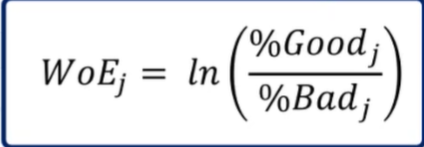

In [84]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good/bad
0     A     59759
1     B    109730
2     C    100245
3     D     61498
4     E     28612
5     F     10530
6     G      2654

In [85]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good/bad
0     A  0.960357
1     B  0.919156
2     C  0.882877
3     D  0.842597
4     E  0.800189
5     F  0.748813
6     G  0.722683

In [86]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [87]:
df1.head(10)

grade  good/bad grade  good/bad
0     A     59759     A  0.960357
1     B    109730     B  0.919156
2     C    100245     C  0.882877
3     D     61498     D  0.842597
4     E     28612     E  0.800189
5     F     10530     F  0.748813
6     G      2654     G  0.722683

In [88]:
df1 = df1.iloc[:,[0,1,3]]

In [89]:
df1.head(5)

grade  good/bad  good/bad
0     A     59759  0.960357
1     B    109730  0.919156
2     C    100245  0.882877
3     D     61498  0.842597
4     E     28612  0.800189

In [90]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [91]:
df1.head(5)

grade   n_obs  prop_good
0     A   59759   0.960357
1     B  109730   0.919156
2     C  100245   0.882877
3     D   61498   0.842597
4     E   28612   0.800189

In [92]:
df1['no_good'] = df1['prop_good'] * df1['n_obs']
df1['no_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [93]:
df1.head(5)

grade   n_obs  prop_good   no_good   no_bad
0     A   59759   0.960357   57390.0   2369.0
1     B  109730   0.919156  100859.0   8871.0
2     C  100245   0.882877   88504.0  11741.0
3     D   61498   0.842597   51818.0   9680.0
4     E   28612   0.800189   22895.0   5717.0

In [94]:
df1['Final_good'] = df1['no_good']/df1['no_good'].sum()
df1['Final_bad'] = df1['no_bad']/df1['no_bad'].sum()

In [95]:
df1.head(5)

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad
0     A   59759   0.960357   57390.0   2369.0    0.173243   0.056730
1     B  109730   0.919156  100859.0   8871.0    0.304463   0.212433
2     C  100245   0.882877   88504.0  11741.0    0.267167   0.281161
3     D   61498   0.842597   51818.0   9680.0    0.156423   0.231806
4     E   28612   0.800189   22895.0   5717.0    0.069113   0.136905

In [96]:
df1['WOE'] = np.log(df1['Final_good']/df1['Final_bad'])

In [97]:
df1.head(5)

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad       WOE
0     A   59759   0.960357   57390.0   2369.0    0.173243   0.056730  1.116386
1     B  109730   0.919156  100859.0   8871.0    0.304463   0.212433  0.359920
2     C  100245   0.882877   88504.0  11741.0    0.267167   0.281161 -0.051055
3     D   61498   0.842597   51818.0   9680.0    0.156423   0.231806 -0.393340
4     E   28612   0.800189   22895.0   5717.0    0.069113   0.136905 -0.683541

In [98]:
df1 = df1.sort_values(['WOE'])

In [99]:
df1

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad       WOE
6     G    2654   0.722683    1918.0    736.0    0.005790   0.017625 -1.113208
5     F   10530   0.748813    7885.0   2645.0    0.023802   0.063340 -0.978725
4     E   28612   0.800189   22895.0   5717.0    0.069113   0.136905 -0.683541
3     D   61498   0.842597   51818.0   9680.0    0.156423   0.231806 -0.393340
2     C  100245   0.882877   88504.0  11741.0    0.267167   0.281161 -0.051055
1     B  109730   0.919156  100859.0   8871.0    0.304463   0.212433  0.359920
0     A   59759   0.960357   57390.0   2369.0    0.173243   0.056730  1.116386

In [100]:
df1.reset_index(drop=True)

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad       WOE
0     G    2654   0.722683    1918.0    736.0    0.005790   0.017625 -1.113208
1     F   10530   0.748813    7885.0   2645.0    0.023802   0.063340 -0.978725
2     E   28612   0.800189   22895.0   5717.0    0.069113   0.136905 -0.683541
3     D   61498   0.842597   51818.0   9680.0    0.156423   0.231806 -0.393340
4     C  100245   0.882877   88504.0  11741.0    0.267167   0.281161 -0.051055
5     B  109730   0.919156  100859.0   8871.0    0.304463   0.212433  0.359920
6     A   59759   0.960357   57390.0   2369.0    0.173243   0.056730  1.116386

In [101]:
df1['IV'] = (df1['Final_good']-df1['Final_bad']) * df1['WOE']

In [102]:
df1['IV'] = df1['IV'].sum()

In [103]:
df1

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
6     G    2654   0.722683    1918.0    736.0    0.005790   0.017625   
5     F   10530   0.748813    7885.0   2645.0    0.023802   0.063340   
4     E   28612   0.800189   22895.0   5717.0    0.069113   0.136905   
3     D   61498   0.842597   51818.0   9680.0    0.156423   0.231806   
2     C  100245   0.882877   88504.0  11741.0    0.267167   0.281161   
1     B  109730   0.919156  100859.0   8871.0    0.304463   0.212433   
0     A   59759   0.960357   57390.0   2369.0    0.173243   0.056730   

        WOE        IV  
6 -1.113208  0.291771  
5 -0.978725  0.291771  
4 -0.683541  0.291771  
3 -0.393340  0.291771  
2 -0.051055  0.291771  
1  0.359920  0.291771  
0  1.116386  0.291771

In [104]:
### Grade Information value is 0.29 which comes under the bracket of 0.1-0.3
### It means medium predictive power to obtain output variable

#### Function to calculate WOE

In [105]:
def woe_discrete(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['no_good'] = df['prop_good'] * df['n_obs']
    df['no_bad'] = (1- df['prop_good']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [106]:
df_temp=woe_discrete(df_input_prep,'grade',df_output_prep)

In [107]:
df_temp

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
0     G    2654   0.722683    1918.0    736.0    0.005790   0.017625   
1     F   10530   0.748813    7885.0   2645.0    0.023802   0.063340   
2     E   28612   0.800189   22895.0   5717.0    0.069113   0.136905   
3     D   61498   0.842597   51818.0   9680.0    0.156423   0.231806   
4     C  100245   0.882877   88504.0  11741.0    0.267167   0.281161   
5     B  109730   0.919156  100859.0   8871.0    0.304463   0.212433   
6     A   59759   0.960357   57390.0   2369.0    0.173243   0.056730   

        WOE        IV  
0 -1.113208  0.291771  
1 -0.978725  0.291771  
2 -0.683541  0.291771  
3 -0.393340  0.291771  
4 -0.051055  0.291771  
5  0.359920  0.291771  
6  1.116386  0.291771

#### Visualizing WOE for dicerete variables to interpret it

In [108]:
sns.set()

In [109]:
def plot_by_woe(df_woe,rotation_of_x_labels=0):
    x = np.array(df_woe.iloc[:,0].apply(str)) ## matplotlib works better with array than dataframes
    y = df_woe['WOE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_labels)

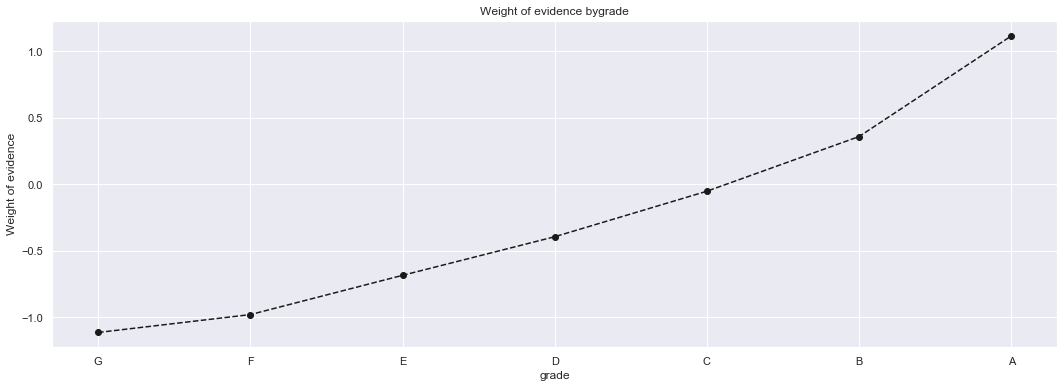

In [110]:
plot_by_woe(df_temp)

In [111]:
### Keeping dummy variable G (grade) as reference
### All other in regression model

##### Home Ownership Variable

In [112]:
df_input_prep.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   
412305      412305  13827698   15890016      17200        17200  ...   
36159        36159    422455     496525       8400         8400  ...   

        addr_state:WI addr_state:WV  addr_state:WY  initial_list_status:f  \
427211              0             0              0                      1   
206088              0             0              0                      1   
136020              0             0              0                      1   
412305              0             0              0                      1   
36159               0             0              0                      1   

       initial_list_status:w  
427211                     0  
206088                     0  
136020                     0  
412305                     0  
36159                      0  

[5 rows x 207 columns]

In [113]:
df_home_owner=woe_discrete(df_input_prep,'home_ownership',df_output_prep)

In [114]:
df_home_owner.head()

home_ownership   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
0          OTHER     137   0.795620     109.0     28.0    0.000329   0.000671   
1           NONE      40   0.850000      34.0      6.0    0.000103   0.000144   
2           RENT  150599   0.871294  131216.0  19383.0    0.396101   0.464163   
3            OWN   33295   0.889593   29619.0   3676.0    0.089411   0.088029   
4       MORTGAGE  188956   0.901215  170290.0  18666.0    0.514054   0.446993   

        WOE   IV  
0 -0.711872  inf  
1 -0.336415  inf  
2 -0.158567  inf  
3  0.015575  inf  
4  0.139783  inf

In [115]:
df_home_owner.tail()

home_ownership   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
1           NONE      40   0.850000      34.0      6.0    0.000103   0.000144   
2           RENT  150599   0.871294  131216.0  19383.0    0.396101   0.464163   
3            OWN   33295   0.889593   29619.0   3676.0    0.089411   0.088029   
4       MORTGAGE  188956   0.901215  170290.0  18666.0    0.514054   0.446993   
5            ANY       1   1.000000       1.0      0.0    0.000003   0.000000   

        WOE   IV  
1 -0.336415  inf  
2 -0.158567  inf  
3  0.015575  inf  
4  0.139783  inf  
5       inf  inf

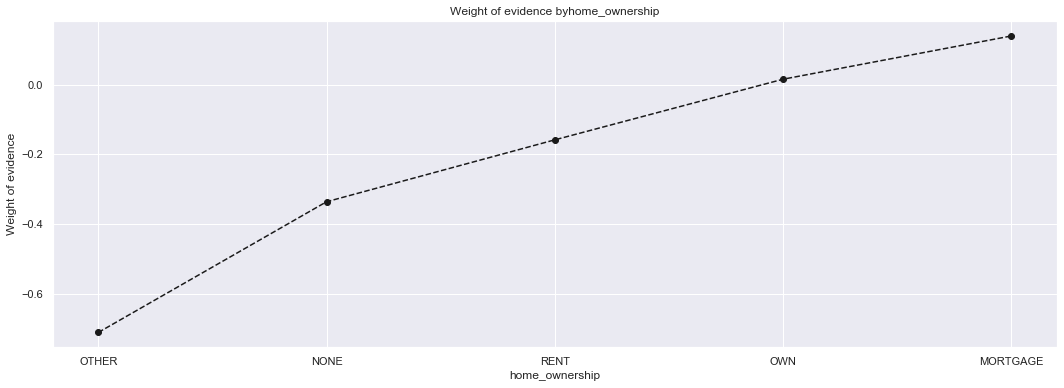

In [116]:
plot_by_woe(df_home_owner)

In [117]:
df_home_owner

home_ownership   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
0          OTHER     137   0.795620     109.0     28.0    0.000329   0.000671   
1           NONE      40   0.850000      34.0      6.0    0.000103   0.000144   
2           RENT  150599   0.871294  131216.0  19383.0    0.396101   0.464163   
3            OWN   33295   0.889593   29619.0   3676.0    0.089411   0.088029   
4       MORTGAGE  188956   0.901215  170290.0  18666.0    0.514054   0.446993   
5            ANY       1   1.000000       1.0      0.0    0.000003   0.000000   

        WOE   IV  
0 -0.711872  inf  
1 -0.336415  inf  
2 -0.158567  inf  
3  0.015575  inf  
4  0.139783  inf  
5       inf  inf

In 2nd column(n_obs) it is clearly visible that OTHER, NONE and ANY has few values in the dataset, therefore it is less
WOE to predict loan default, but it is not good to delete those variables as those are most riskiest values, better if we combine them to get good amount of information

For RENT also, WOE is very low so we can combine it with OTHER,NONE and ANY

In [119]:
df_input_prep['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_input_prep['home_ownership:OTHER'] ,df_input_prep['home_ownership:RENT'],
                                                          df_input_prep['home_ownership:NONE'],df_input_prep['home_ownership:ANY']])

From a set of categorical variables that represent one original independent variable, we make a reference category the 
category with lowest WOE value

#### address state discrete variable

In [120]:
df_input_prep['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [121]:
df_addr_state=woe_discrete(df_input_prep,'addr_state',df_output_prep)

In [122]:
df_addr_state.head()

addr_state  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0         NE     13   0.461538      6.0     7.0    0.000018   0.000168   
1         IA     13   0.769231     10.0     3.0    0.000030   0.000072   
2         NV   5221   0.863436   4508.0   713.0    0.013608   0.017074   
3         FL  25211   0.873309  22017.0  3194.0    0.066463   0.076487   
4         AL   4671   0.874331   4084.0   587.0    0.012328   0.014057   

        WOE   IV  
0 -2.225166  inf  
1 -0.867043  inf  
2 -0.226888  inf  
3 -0.140475  inf  
4 -0.131208  inf

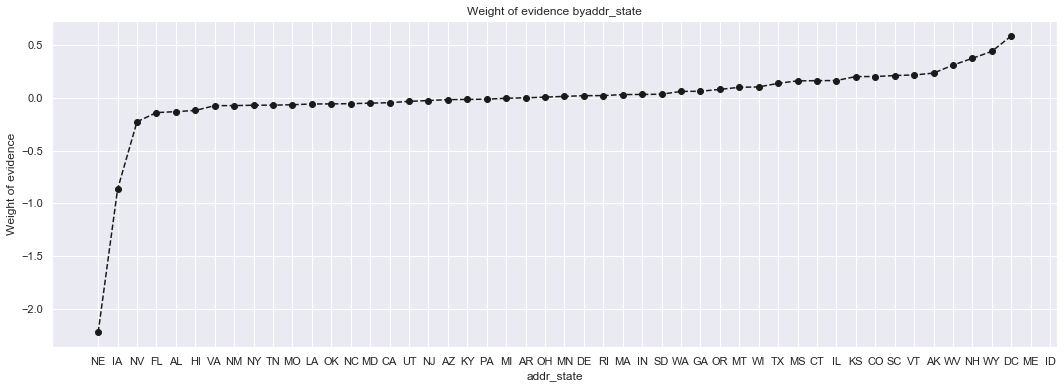

In [123]:
plot_by_woe(df_addr_state)

In [124]:
if ['addr_state:ND'] in df_input_prep.columns.values:
    pass
else:
    df_input_prep['addr_state:ND'] = 0

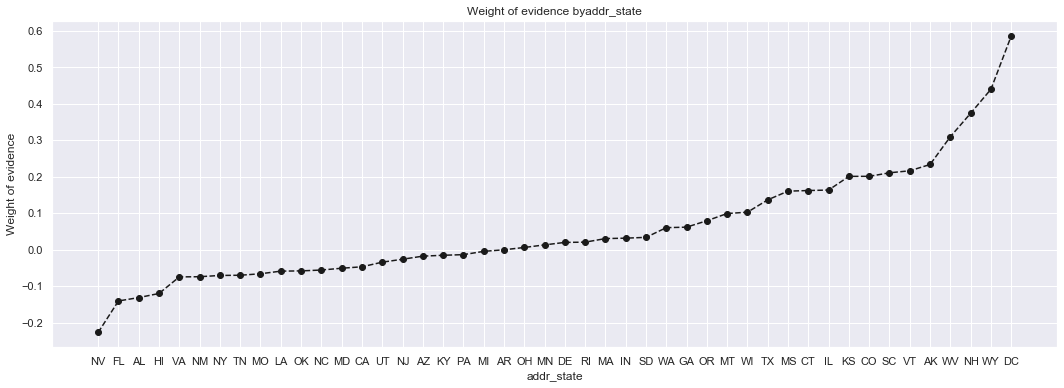

In [125]:
plot_by_woe(df_addr_state.iloc[2:-2,:])

Earlier first two and last two states were making us believe that all states from NV to DC wee kind of similar but ideally 
it is not

Combine NE, IA, NV, FL, Al, HI based on WOE and number of observation, all of these are having worst borrowers , WOE is lowest
Being conservative, add ND(North Dakota earlier not in the list) also in this category

Last four WV,NH,WY,DC and ME,ID are having good borrowers -combine them

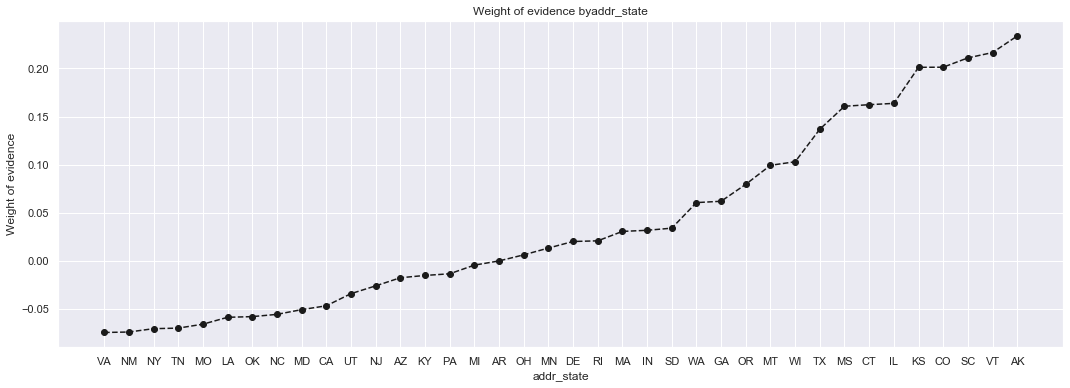

In [127]:
plot_by_woe(df_addr_state.iloc[6:-6,:])

VA,NM,NY,TN,MO,LA,OK,NC,MD,CA have similar WOE
However NY and CA have many borrowers so they will be a seperate dummy variable

Final categories from VA to CA will be;
1. VA,NM
2. NY
3. TN,MO,LA,OK,NC,MA
4. CA

In [128]:
### THEN UT,NJ,AZ,KY

#### 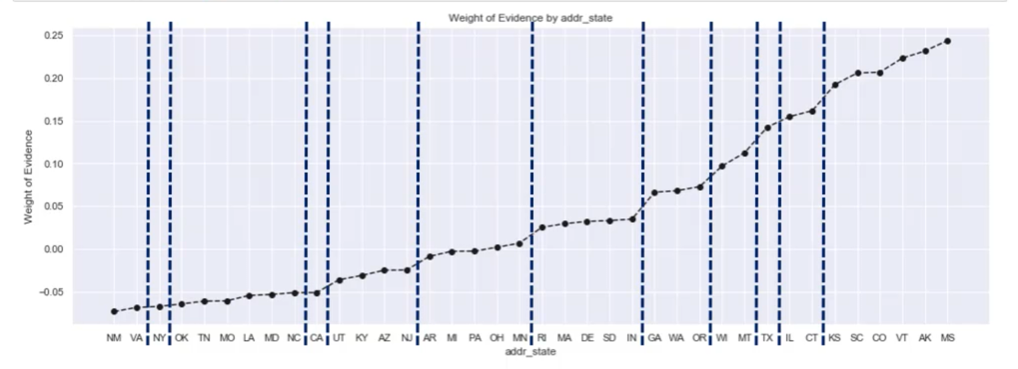

In [129]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.
df_inputs_prepr = df_input_prep.copy()

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [130]:
df_inputs_prepr.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   
412305      412305  13827698   15890016      17200        17200  ...   
36159        36159    422455     496525       8400         8400  ...   

        addr_state:GA_WA_OR addr_state:WI_MT  addr_state:IL_CT  \
427211                    0                0                 0   
206088                    0                0                 0   
136020                    1                0                 0   
412305                    0                0                 0   
36159                     0                0                 0   

        addr_state:KS_SC_CO_VT_AK_MS addr_state:WV_NH_WY_DC_ME_ID  
427211                             1                            0  
206088                             0                            0  
136020                             0                            0  
412305                             0                            0  
36159                              0                            0  

[5 rows x 220 columns]

#### verification status discrete variable

In [131]:
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [132]:
df_verification_status=woe_discrete(df_input_prep,'verification_status',df_output_prep)

In [133]:
df_verification_status.head()

verification_status   n_obs  prop_good   no_good   no_bad  Final_good  \
0            Verified  134414   0.869761  116908.0  17506.0     0.35291   
1     Source Verified  120030   0.892768  107159.0  12871.0     0.32348   
2        Not Verified  118584   0.904017  107202.0  11382.0     0.32361   

   Final_bad       WOE        IV  
0   0.419215 -0.172172  0.020916  
1   0.308221  0.048321  0.020916  
2   0.272564  0.171666  0.020916

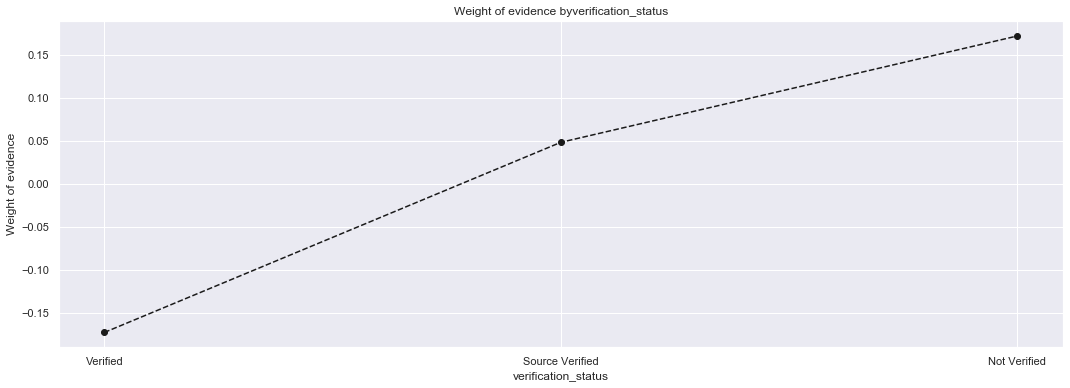

In [134]:
plot_by_woe(df_verification_status)

#### purpose discrete variable

In [135]:
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'educational', 'other', 'home_improvement',
       'credit_card', 'major_purchase', 'wedding', 'small_business',
       'vacation', 'house', 'car', 'moving', 'renewable_energy',
       'medical'], dtype=object)

In [136]:
df_purpose=woe_discrete(df_input_prep,'purpose',df_output_prep)

In [137]:
df_purpose.head()

purpose  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0  small_business   5582   0.780903   4359.0  1223.0    0.013158   0.029287   
1     educational    333   0.801802    267.0    66.0    0.000806   0.001580   
2          moving   2392   0.837375   2003.0   389.0    0.006046   0.009315   
3           house   1830   0.857923   1570.0   260.0    0.004739   0.006226   
4           other  18884   0.859246  16226.0  2658.0    0.048981   0.063651   

        WOE        IV  
0 -0.800080  0.035288  
1 -0.673422  0.035288  
2 -0.432194  0.035288  
3 -0.272866  0.035288  
4 -0.261975  0.035288

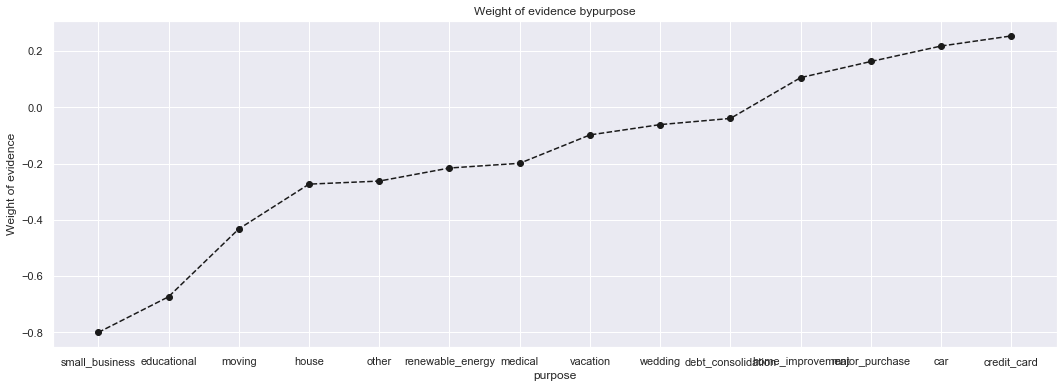

In [138]:
plot_by_woe(df_purpose)

In [189]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [190]:
# 'initial_list_status'
df_initial_list_status = woe_discrete(df_inputs_prepr, 'initial_list_status', df_output_prep)
df_initial_list_status

initial_list_status   n_obs  prop_good   no_good   no_bad  Final_good  \
0                   f  242514   0.877459  212796.0  29718.0    0.642366   
1                   w  130514   0.907742  118473.0  12041.0    0.357634   

   Final_bad       WOE        IV  
0   0.711655 -0.102435  0.022019  
1   0.288345  0.215352  0.022019

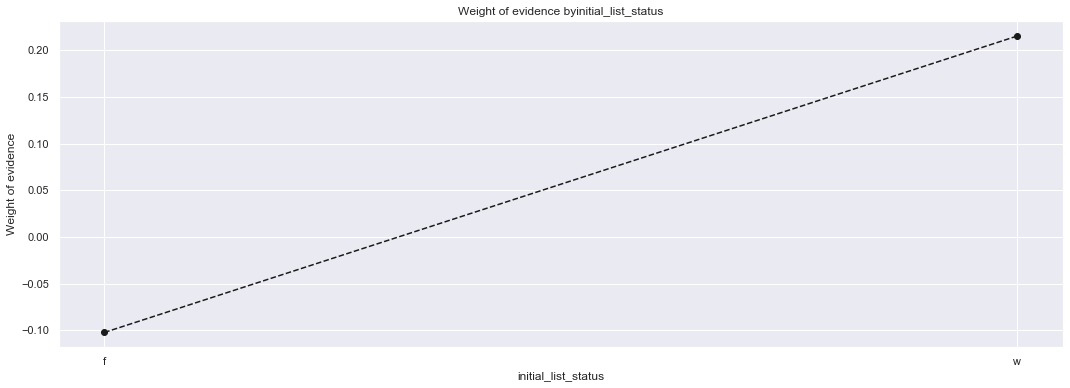

In [191]:
plot_by_woe(df_initial_list_status)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

When we calculate and plot the weights of evidence of continuous variables categories, what do we sort them by their own
values in ascending order

In [193]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [206]:
def plot_by_woe(df_woe,rotation_of_x_labels=0):
    x = np.array(df_woe.iloc[:,0].apply(str)) ## matplotlib works better with array than dataframes
    y = df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_labels)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [207]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [208]:
df_term_int = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_output_prep)
# We calculate weight of evidence.
df_term_int

term_int   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0        36  270419   0.900706    0.724929  243568.0  ...    0.642999   
1        60  102609   0.854711    0.275071   87701.0  ...    0.357001   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.134077             NaN       NaN  0.039953  
1 -0.298980        0.045995  0.433058  0.039953  

[2 rows x 12 columns]

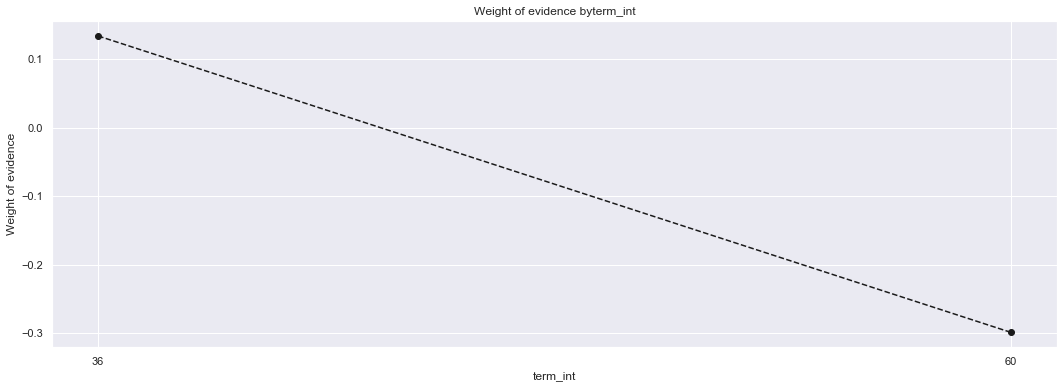

In [209]:
plot_by_woe(df_term_int)
# We plot the weight of evidence values.

#### emp_length_int

In [211]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [212]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [213]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_output_prep)
# We calculate weight of evidence.
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0              0.0   45720   0.873250    0.122565   39925.0  ...    0.138772   
1              1.0   23654   0.884417    0.063411   20920.0  ...    0.065471   
2              2.0   33078   0.888204    0.088674   29380.0  ...    0.088556   
3              3.0   29205   0.888067    0.078292   25936.0  ...    0.078283   
4              4.0   22468   0.887662    0.060231   19944.0  ...    0.060442   
5              5.0   24602   0.882408    0.065952   21709.0  ...    0.069278   
6              6.0   20887   0.881697    0.055993   18416.0  ...    0.059173   
7              7.0   21049   0.885268    0.056427   18634.0  ...    0.057832   
8              8.0   17853   0.887918    0.047860   15852.0  ...    0.047918   
9              9.0   14267   0.883017    0.038246   12598.0  ...    0.039967   
10            10.0  120245   0.897792    0.322348  107955.0  ...    0.294308   

         WoE  diff_prop_good  diff_WoE        IV  
0  -0.141009             NaN       NaN  0.006448  
1  -0.036076        0.011167  0.104933  0.006448  
2   0.001506        0.003787  0.037582  0.006448  
3   0.000132        0.000137  0.001374  0.006448  
4  -0.003932        0.000405  0.004064  0.006448  
5  -0.055583        0.005255  0.051651  0.006448  
6  -0.062419        0.000711  0.006836  0.006448  
7  -0.027727        0.003571  0.034692  0.006448  
8  -0.001367        0.002650  0.026360  0.006448  
9  -0.049702        0.004901  0.048335  0.006448  
10  0.101913        0.014775  0.151615  0.006448  

[11 rows x 12 columns]

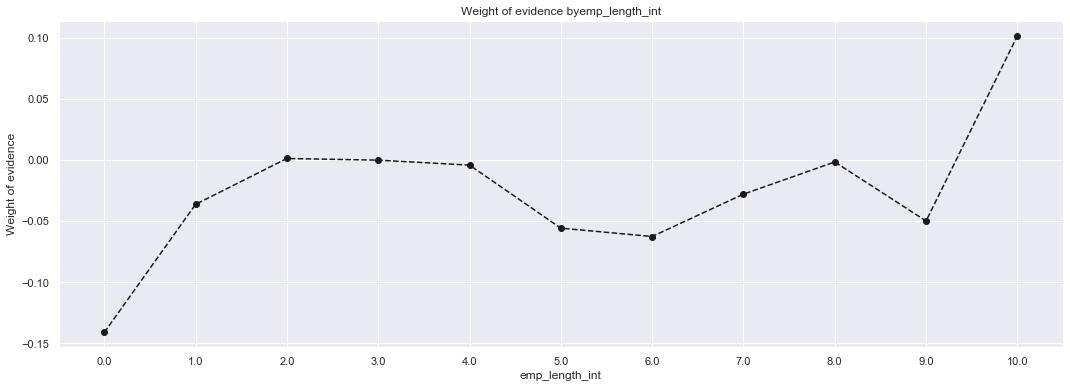

In [214]:
plot_by_woe(df_temp)

In [215]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

#### months since issue

In [217]:
df_inputs_prepr.head(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   
412305      412305  13827698   15890016      17200        17200  ...   
36159        36159    422455     496525       8400         8400  ...   

        emp_length:1 emp_length:2-4  emp_length:5-6  emp_length:7-9  \
427211             0              1               0               0   
206088             0              0               1               0   
136020             0              0               0               0   
412305             0              0               0               1   
36159              0              0               1               0   

       emp_length:10  
427211             0  
206088             0  
136020             1  
412305             0  
36159              0  

[5 rows x 231 columns]

In [218]:
df_inputs_prepr.mths_since_issue.unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

Fine classing of continous or discrete high ordered variable

In [220]:
df_inputs_prepr['mths_since_issue'] = pd.cut(df_inputs_prepr['mths_since_issue'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [221]:
df_inputs_prepr.mths_since_issue.unique()

[(43.2, 45.0], (63.0, 64.8], (52.2, 54.0], (100.8, 102.6], (35.91, 37.8], ..., (99.0, 100.8], (120.6, 122.4], (106.2, 108.0], (122.4, 124.2], (108.0, 109.8]]
Length: 50
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [222]:
df_inputs_prepr['mths_since_issue']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [223]:
# mths_since_issue_d
df_mnths_since_issue = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue', df_output_prep)
# We calculate weight of evidence.
df_mnths_since_issue.head(10)

mths_since_issue  n_obs  prop_good  prop_n_obs   n_good  ...  prop_n_bad  \
0     (35.91, 37.8]  28170   0.938942    0.075517  26450.0  ...    0.041189   
1      (37.8, 39.6]  39636   0.923958    0.106255  36622.0  ...    0.072176   
2      (39.6, 41.4]  38614   0.913477    0.103515  35273.0  ...    0.080007   
3      (41.4, 43.2]  29038   0.904573    0.077844  26267.0  ...    0.066357   
4      (43.2, 45.0]  28367   0.898720    0.076045  25494.0  ...    0.068800   
5      (45.0, 46.8]  12165   0.896178    0.032611  10902.0  ...    0.030245   
6      (46.8, 48.6]  24451   0.895914    0.065547  21906.0  ...    0.060945   
7      (48.6, 50.4]  22969   0.885890    0.061574  20348.0  ...    0.062765   
8      (50.4, 52.2]  20640   0.878101    0.055331  18124.0  ...    0.060250   
9      (52.2, 54.0]  18312   0.864897    0.049090  15838.0  ...    0.059245   
10     (54.0, 55.8]   8286   0.854453    0.022213   7080.0  ...    0.028880   
11     (55.8, 57.6]  14120   0.861190    0.037852  12160.0  ...    0.046936   
12     (57.6, 59.4]  11529   0.857403    0.030907   9885.0  ...    0.039369   
13     (59.4, 61.2]   9974   0.851815    0.026738   8496.0  ...    0.035394   
14     (61.2, 63.0]   9811   0.851595    0.026301   8355.0  ...    0.034867   
15     (63.0, 64.8]   4304   0.844099    0.011538   3633.0  ...    0.016068   
16     (64.8, 66.6]   6723   0.824037    0.018023   5540.0  ...    0.028329   
17     (66.6, 68.4]   5334   0.840457    0.014299   4483.0  ...    0.020379   
18     (68.4, 70.2]   4377   0.846242    0.011734   3704.0  ...    0.016116   
19     (70.2, 72.0]   3868   0.827301    0.010369   3200.0  ...    0.015997   
20     (72.0, 73.8]   1785   0.854342    0.004785   1525.0  ...    0.006226   
21     (73.8, 75.6]   3395   0.852430    0.009101   2894.0  ...    0.011997   
22     (75.6, 77.4]   3055   0.853355    0.008190   2607.0  ...    0.010728   
23     (77.4, 79.2]   2849   0.840646    0.007637   2395.0  ...    0.010872   
24     (79.2, 81.0]   2412   0.851990    0.006466   2055.0  ...    0.008549   
25     (81.0, 82.8]   1044   0.869732    0.002799    908.0  ...    0.003257   
26     (82.8, 84.6]   2182   0.870302    0.005849   1899.0  ...    0.006777   
27     (84.6, 86.4]   1997   0.854782    0.005353   1707.0  ...    0.006945   
28     (86.4, 88.2]   1921   0.833941    0.005150   1602.0  ...    0.007639   
29     (88.2, 90.0]   1870   0.842246    0.005013   1575.0  ...    0.007064   
30     (90.0, 91.8]    795   0.859119    0.002131    683.0  ...    0.002682   
31     (91.8, 93.6]   1373   0.890750    0.003681   1223.0  ...    0.003592   
32     (93.6, 95.4]   1087   0.874885    0.002914    951.0  ...    0.003257   
33     (95.4, 97.2]   1044   0.882184    0.002799    921.0  ...    0.002945   
34     (97.2, 99.0]    877   0.856328    0.002351    751.0  ...    0.003017   
35    (99.0, 100.8]    346   0.878613    0.000928    304.0  ...    0.001006   
36   (100.8, 102.6]    647   0.863988    0.001734    559.0  ...    0.002107   
37   (102.6, 104.4]    542   0.850554    0.001453    461.0  ...    0.001940   
38   (104.4, 106.2]    497   0.869215    0.001332    432.0  ...    0.001557   
39   (106.2, 108.0]    403   0.853598    0.001080    344.0  ...    0.001413   
40   (108.0, 109.8]    173   0.803468    0.000464    139.0  ...    0.000814   
41   (109.8, 111.6]    139   0.834532    0.000373    116.0  ...    0.000551   
42   (111.6, 113.4]    204   0.799020    0.000547    163.0  ...    0.000982   
43   (113.4, 115.2]    182   0.796703    0.000488    145.0  ...    0.000886   
44   (115.2, 117.0]    530   0.762264    0.001421    404.0  ...    0.003017   
45   (117.0, 118.8]    247   0.797571    0.000662    197.0  ...    0.001197   
46   (118.8, 120.6]    394   0.723350    0.001056    285.0  ...    0.002610   
47   (120.6, 122.4]    176   0.704545    0.000472    124.0  ...    0.001245   
48   (122.4, 124.2]    104   0.750000    0.000279     78.0  ...    0.000623   
49   (124.2, 126.0]     70   0.885714    0.000188    

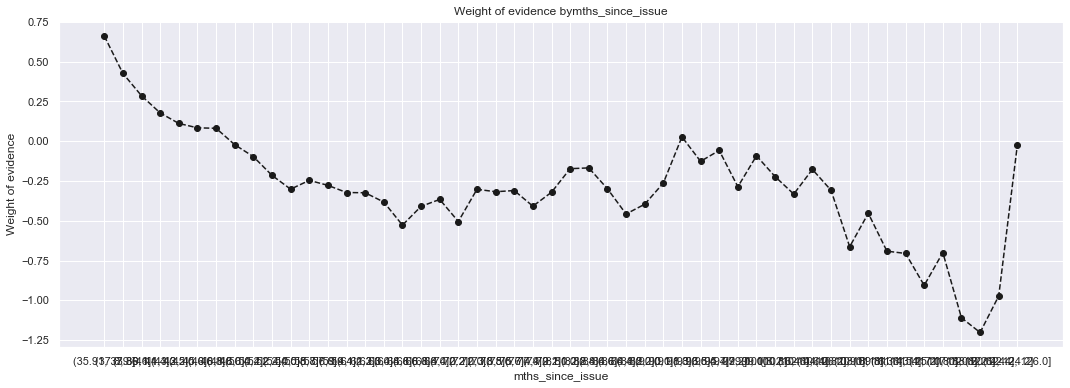

In [224]:
plot_by_woe(df_mnths_since_issue)

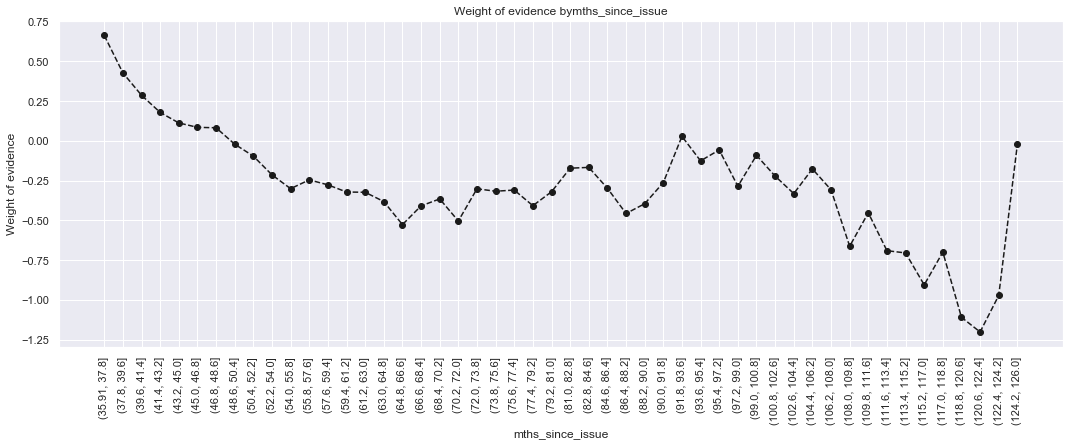

In [225]:
plot_by_woe(df_mnths_since_issue,rotation_of_x_labels=90)

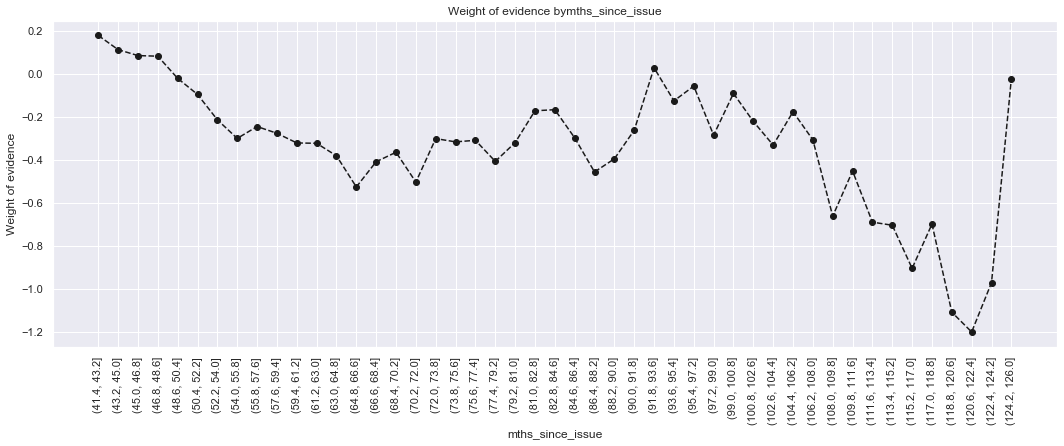

In [226]:
plot_by_woe(df_mnths_since_issue.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [227]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(85, 127)), 1, 0)

### Fine classing

In [229]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [230]:
df_inputs_prepr['int_rate_factor'].unique()

[(8.722, 9.135], (14.089, 14.502], (16.566, 16.978], (12.438, 12.85], (7.484, 7.897], ..., (21.519, 21.932], (24.409, 24.822], (25.234, 25.647], (5.399, 5.833], (24.822, 25.234]]
Length: 50
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [231]:
df_inputs_prepr['int_rate_factor']

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
                ...       
259178       (8.31, 8.722]
365838     (12.438, 12.85]
131932    (14.089, 14.502]
146867    (10.786, 11.199]
121958    (11.199, 11.612]
Name: int_rate_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [232]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head(10)

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good  ...  prop_n_bad  \
0  (5.399, 5.833]    785   0.961783    0.002104    755.0  ...    0.000718   
1  (5.833, 6.246]   8459   0.979667    0.022677   8287.0  ...    0.004119   
2  (6.246, 6.658]   7826   0.970994    0.020980   7599.0  ...    0.005436   
3  (6.658, 7.071]   1816   0.973018    0.004868   1767.0  ...    0.001173   
4  (7.071, 7.484]   3143   0.976137    0.008426   3068.0  ...    0.001796   
5  (7.484, 7.897]  12581   0.961688    0.033727  12099.0  ...    0.011542   
6   (7.897, 8.31]   9687   0.949210    0.025969   9195.0  ...    0.011782   
7   (8.31, 8.722]   6594   0.963907    0.017677   6356.0  ...    0.005699   
8  (8.722, 9.135]   9539   0.936052    0.025572   8929.0  ...    0.014608   
9  (9.135, 9.548]   6681   0.962131    0.017910   6428.0  ...    0.006059   

        WoE  diff_prop_good  diff_WoE        IV  
0  1.154505             NaN       NaN  0.344154  
1  1.803933        0.017883  0.649428  0.344154  
2  1.439806        0.008673  0.364127  0.344154  
3  1.514202        0.002023  0.074396  0.344154  
4  1.640277        0.003120  0.126075  0.344154  
5  1.151918        0.014449  0.488359  0.344154  
6  0.856921        0.012478  0.294998  0.344154  
7  1.213868        0.014696  0.356947  0.344154  
8  0.612585        0.027855  0.601283  0.344154  
9  1.164014        0.026079  0.551429  0.344154  

[10 rows x 12 columns]

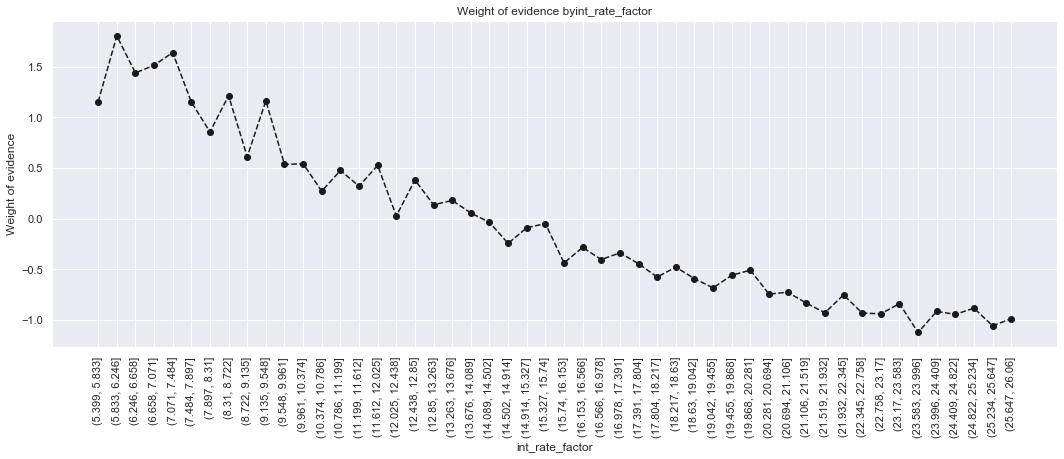

In [233]:
plot_by_woe(df_temp,rotation_of_x_labels=90)

Greater the interest rate, lower the WOE and higher the probability of default (riskier)

In [235]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [236]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [237]:
df_inputs_prepr.head(3)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   

        int_rate:<9.548 int_rate:9.548-12.025  int_rate:12.025-15.74  \
427211                1                     0                      0   
206088                0                     0                      1   
136020                1                     0                      0   

        int_rate:15.74-20.281 int_rate:>20.281  
427211                      0                0  
206088                      0                0  
136020                      0                0  

[3 rows x 245 columns]

In [238]:
df_inputs_prepr['funded_amnt'].unique()

array([24000, 10000, 20425, ..., 34650, 32775,   950], dtype=int64)

In [239]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head(5)

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0    (465.5, 1190.0]   1224   0.904412    0.003281  1107.0  ...    0.002802   
1   (1190.0, 1880.0]   3028   0.903236    0.008117  2735.0  ...    0.007016   
2   (1880.0, 2570.0]   6018   0.891825    0.016133  5367.0  ...    0.015589   
3   (2570.0, 3260.0]   7248   0.886451    0.019430  6425.0  ...    0.019708   
4   (3260.0, 3950.0]   4751   0.889286    0.012736  4225.0  ...    0.012596   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.176219             NaN       NaN  0.014241  
1  0.162698        0.001175  0.013521  0.014241  
2  0.038499        0.011412  0.124199  0.014241  
3 -0.016020        0.005373  0.054519  0.014241  
4  0.012458        0.002835  0.028478  0.014241  

[5 rows x 12 columns]

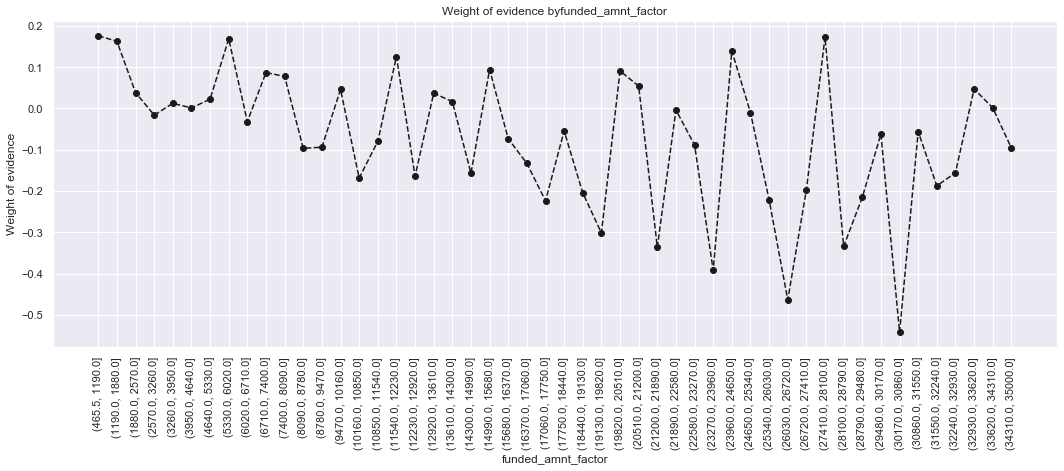

In [240]:
plot_by_woe(df_temp,rotation_of_x_labels=90)

In [241]:
### No need to inlude funded amount in the pD model as WOE is independent of the WOE

### Data Preparation: Continuous Variables, Part 1 and 2

In [242]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head(5)

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                    (-0.587, 11.74]     24      0.875    0.000064    21.0   
1                     (11.74, 23.48]      0        NaN    0.000000     NaN   
2                     (23.48, 35.22]      0        NaN    0.000000     NaN   
3                     (35.22, 46.96]      0        NaN    0.000000     NaN   
4                      (46.96, 58.7]      0        NaN    0.000000     NaN   

   ...  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0  ...    0.000072 -0.125106             NaN       NaN  0.016285  
1  ...         NaN       NaN             NaN       NaN  0.016285  
2  ...         NaN       NaN             NaN       NaN  0.016285  
3  ...         NaN       NaN             NaN       NaN  0.016285  
4  ...         NaN       NaN             NaN       NaN  0.016285  

[5 rows x 12 columns]

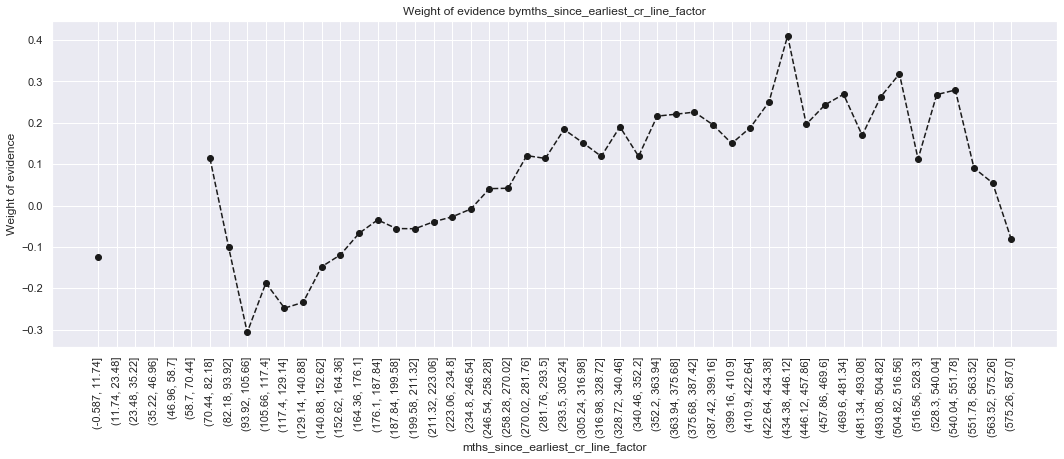

In [243]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

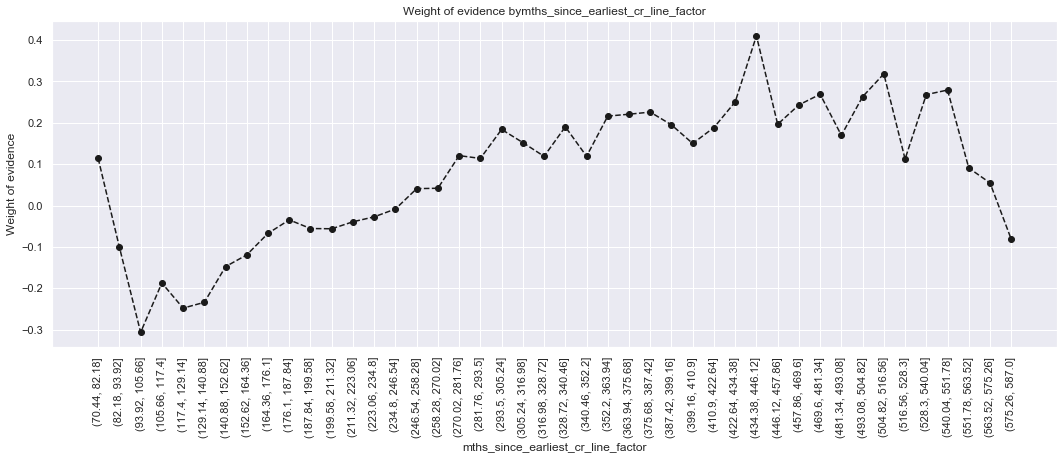

In [244]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [245]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [246]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_output_prep)
# We calculate weight of evidence.
df_temp.head(5)

C:\Users\TAN\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0          0.0  306417   0.888097    0.821432  272128.0  ...    0.821116   
1          1.0   44927   0.889955    0.120439   39983.0  ...    0.118394   
2          2.0   13118   0.884662    0.035166   11605.0  ...    0.036232   
3          3.0    4550   0.879341    0.012197    4001.0  ...    0.013147   
4          4.0    1868   0.893469    0.005008    1669.0  ...    0.004765   

        WoE  diff_prop_good  diff_WoE   IV  
0  0.000432             NaN       NaN  inf  
1  0.019264        0.001858  0.018832  inf  
2 -0.033674        0.005293  0.052938  inf  
3 -0.084815        0.005322  0.051140  inf  
4  0.055659        0.014128  0.140474  inf  

[5 rows x 12 columns]

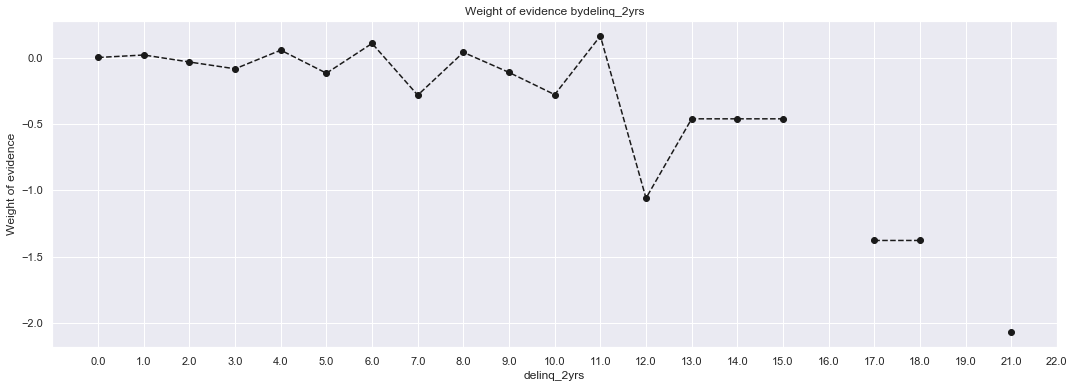

In [247]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [248]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [250]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0             0.0  193232   0.905942    0.518009  175057.0  ...    0.435236   
1             1.0  104163   0.882213    0.279236   91894.0  ...    0.293805   
2             2.0   46214   0.861406    0.123889   39809.0  ...    0.153380   
3             3.0   20040   0.836826    0.053723   16770.0  ...    0.078306   
4             4.0    5810   0.844062    0.015575    4904.0  ...    0.021696   

        WoE  diff_prop_good  diff_WoE   IV  
0  0.194049             NaN       NaN  inf  
1 -0.057456        0.023729  0.251505  inf  
2 -0.244002        0.020808  0.186546  inf  
3 -0.436214        0.024579  0.192212  inf  
4 -0.382249        0.007236  0.053966  inf  

[5 rows x 12 columns]

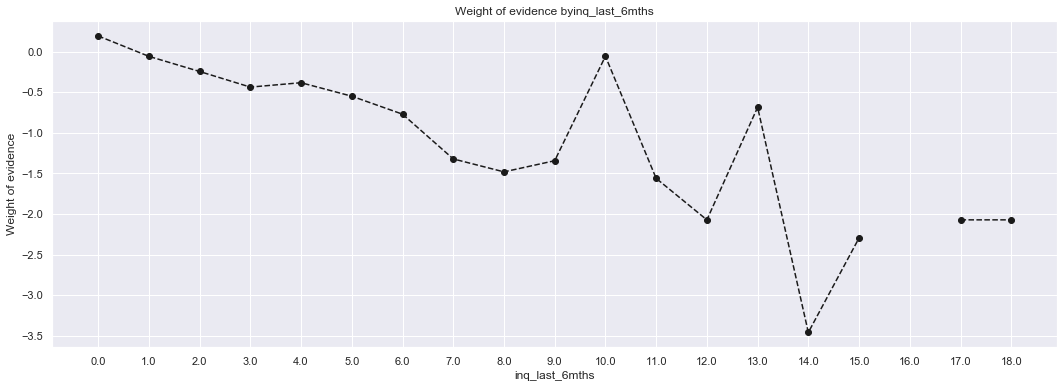

In [251]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [252]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [253]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

open_acc  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad       WoE  \
0       0.0     29   0.758621    0.000078    22.0  ...    0.000168 -0.925883   
1       1.0    110   0.872727    0.000295    96.0  ...    0.000335 -0.145725   
2       2.0   1456   0.844780    0.003903  1230.0  ...    0.005412 -0.376781   
3       3.0   4378   0.872545    0.011736  3820.0  ...    0.013362 -0.147369   
4       4.0  10028   0.889609    0.026883  8921.0  ...    0.026509  0.015739   

   diff_prop_good  diff_WoE   IV  
0             NaN       NaN  inf  
1        0.114107  0.780159  inf  
2        0.027947  0.231056  inf  
3        0.027764  0.229412  inf  
4        0.017065  0.163108  inf  

[5 rows x 12 columns]

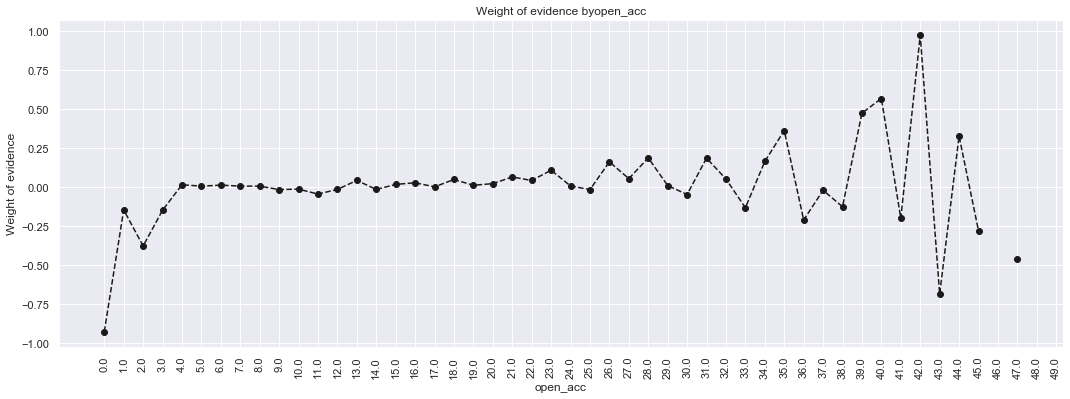

In [254]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

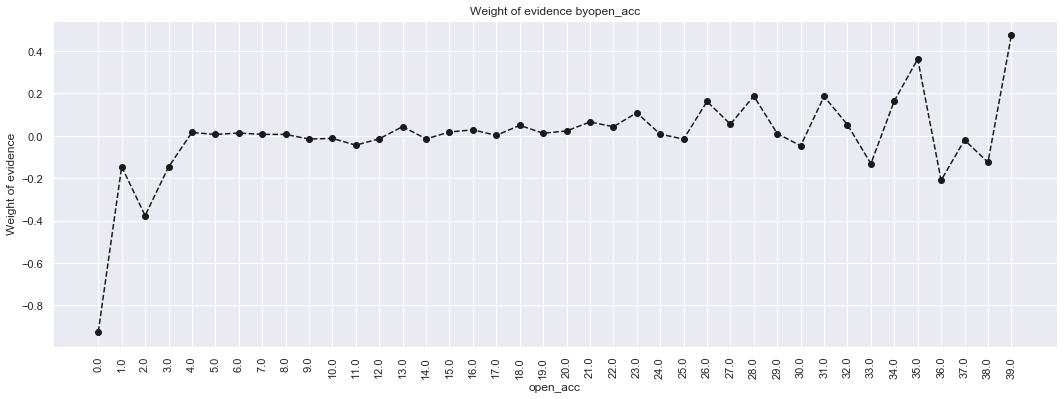

In [255]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [256]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [258]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

pub_rec   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0      0.0  323999   0.887416    0.868565  287522.0  ...    0.873512   
1      1.0   42381   0.890328    0.113613   37733.0  ...    0.111305   
2      2.0    4527   0.897504    0.012136    4063.0  ...    0.011111   
3      3.0    1280   0.916406    0.003431    1173.0  ...    0.002562   
4      4.0     408   0.921569    0.001094     376.0  ...    0.000766   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.006398             NaN       NaN  inf  
1  0.023082        0.002912  0.029481  inf  
2  0.098777        0.007176  0.075694  inf  
3  0.323475        0.018902  0.224699  inf  
4  0.392838        0.005162  0.069362  inf  

[5 rows x 12 columns]

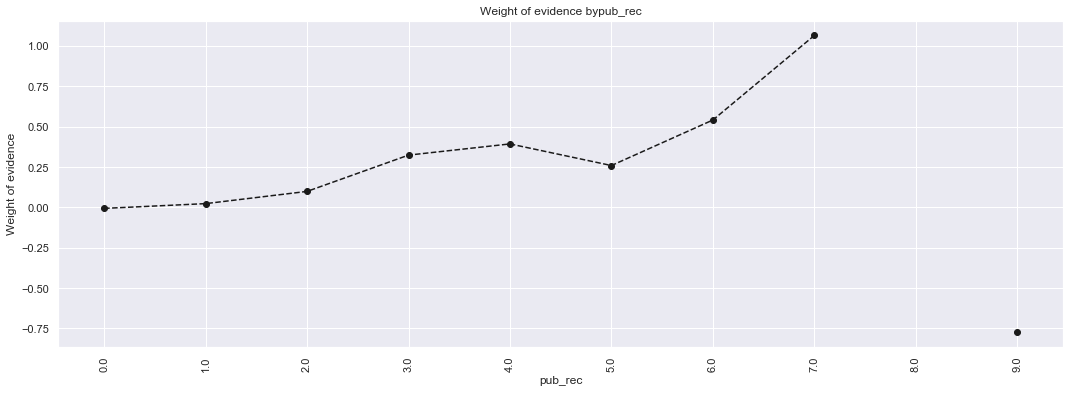

In [259]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [260]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [261]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good  ...  prop_n_bad  \
0     (-0.15, 3.0]    459   0.810458    0.001230    372.0  ...    0.002083   
1       (3.0, 6.0]   6004   0.862758    0.016095   5180.0  ...    0.019732   
2       (6.0, 9.0]  15047   0.870140    0.040337  13093.0  ...    0.046792   
3      (9.0, 12.0]  25169   0.878621    0.067472  22114.0  ...    0.073158   
4     (12.0, 15.0]  33651   0.878934    0.090210  29577.0  ...    0.097560   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.618030             NaN       NaN  inf  
1 -0.232626        0.052301  0.385404  inf  
2 -0.168817        0.007382  0.063809  inf  
3 -0.091584        0.008480  0.077232  inf  
4 -0.088644        0.000313  0.002940  inf  

[5 rows x 12 columns]

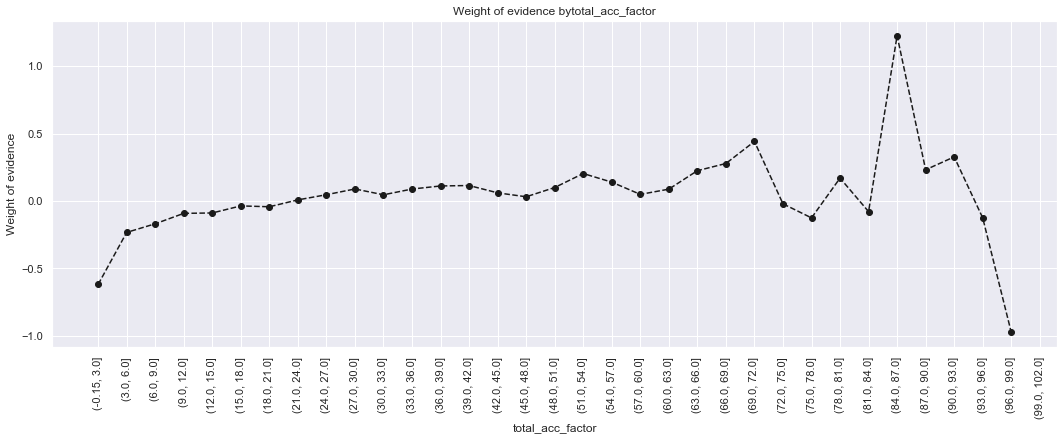

In [262]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [263]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [264]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0             0.0  371682   0.888025    0.996392  330063.0  ...    0.996647   
1             1.0    1263   0.894695    0.003386    1130.0  ...    0.003185   
2             2.0      70   0.928571    0.000188      65.0  ...    0.000120   
3             3.0       7   0.857143    0.000019       6.0  ...    0.000024   
4             4.0       4   1.000000    0.000011       4.0  ...    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.000289             NaN       NaN  inf  
1  0.068608        0.006670  0.068897  inf  
2  0.493934        0.033876  0.425326  inf  
3 -0.279256        0.071429  0.773190  inf  
4       inf        0.142857       inf  inf  

[5 rows x 12 columns]

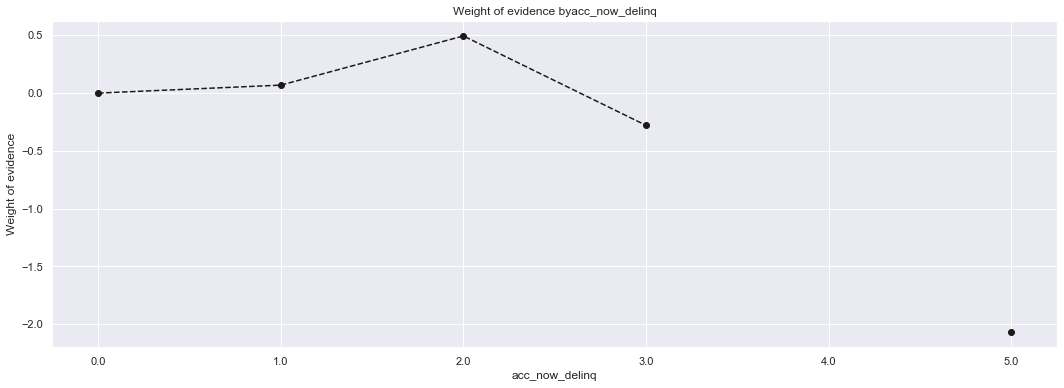

In [265]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [266]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [267]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  ...  \
0     (-9999.999, 5000.0]  19417   0.863779    0.052052  16772.0  ...   
1      (5000.0, 9999.999]  52655   0.873516    0.141156  45995.0  ...   
2   (9999.999, 14999.998]  59570   0.877556    0.159693  52276.0  ...   
3  (14999.998, 19999.998]  51455   0.874628    0.137939  45004.0  ...   
4  (19999.998, 24999.997]  41582   0.882882    0.111472  36712.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.063340 -0.223976             NaN       NaN  inf  
1    0.159487 -0.138603        0.009737  0.085373  inf  
2    0.174669 -0.101530        0.004040  0.037072  inf  
3    0.154482 -0.128500        0.002928  0.026969  inf  
4    0.116622 -0.051006        0.008254  0.077494  inf  

[5 rows x 12 columns]

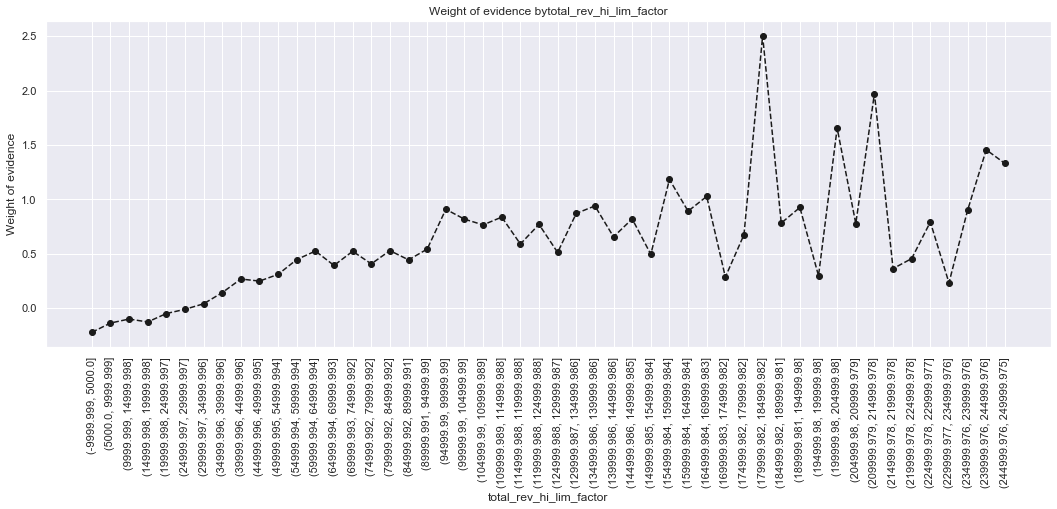

In [268]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [269]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [271]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

installment_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0    (14.276, 43.556]   1812   0.905629    0.004858  1641.0  ...    0.004095   
1    (43.556, 71.443]   4841   0.896302    0.012978  4339.0  ...    0.012021   
2    (71.443, 99.329]   6824   0.891266    0.018294  6082.0  ...    0.017769   
3   (99.329, 127.216]   9138   0.887722    0.024497  8112.0  ...    0.024570   
4  (127.216, 155.102]  10040   0.893625    0.026915  8972.0  ...    0.025575   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.190382             NaN       NaN  0.014179  
1  0.085783        0.009327  0.104598  0.014179  
2  0.032724        0.005036  0.053059  0.014179  
3 -0.003339        0.003545  0.036063  0.014179  
4  0.057305        0.005904  0.060644  0.014179  

[5 rows x 12 columns]

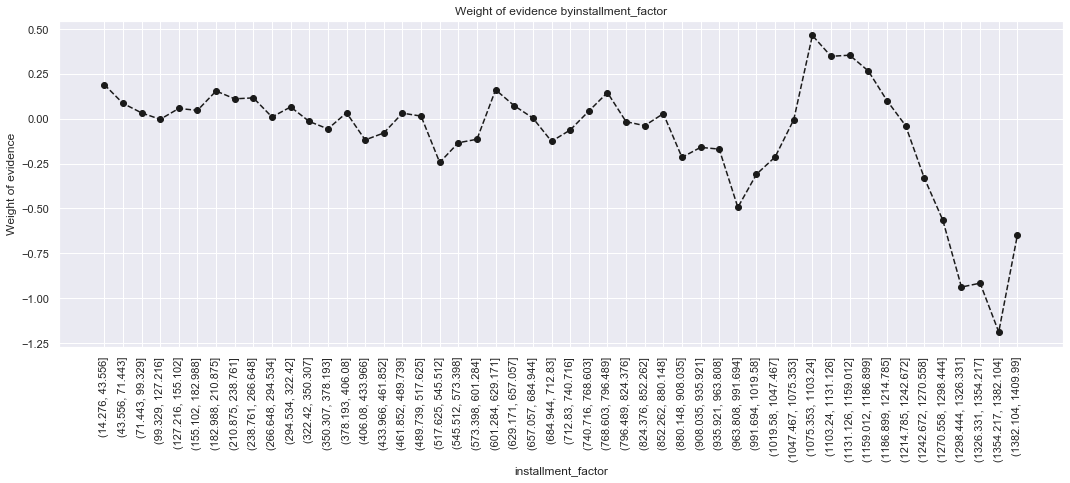

In [272]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [273]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0  (-5243.882, 144693.64]  351904   0.885921    0.943372  311759.0  ...   
1  (144693.64, 287491.28]   19004   0.923016    0.050945   17541.0  ...   
2  (287491.28, 430288.92]    1525   0.927869    0.004088    1415.0  ...   
3  (430288.92, 573086.56]     332   0.939759    0.000890     312.0  ...   
4   (573086.56, 715884.2]     112   0.883929    0.000300      99.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.961350 -0.021283             NaN       NaN  inf  
1    0.035034  0.413036        0.037096  0.434319  inf  
2    0.002634  0.483389        0.004853  0.070353  inf  
3    0.000479  0.676255        0.011890  0.192866  inf  
4    0.000311 -0.040845        0.055830  0.717100  inf  

[5 rows x 12 columns]

In [274]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0   (-5243.882, 73294.82]  231445   0.873231    0.620449  202105.0  ...   
1   (73294.82, 144693.64]  120459   0.910301    0.322922  109654.0  ...   
2  (144693.64, 216092.46]   15885   0.922694    0.042584   14657.0  ...   
3  (216092.46, 287491.28]    3119   0.924655    0.008361    2884.0  ...   
4   (287491.28, 358890.1]    1117   0.925694    0.002994    1034.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.702603 -0.141180             NaN       NaN  inf  
1    0.258747  0.246305        0.037070  0.387485  inf  
2    0.029407  0.408515        0.012393  0.162210  inf  
3    0.005628  0.436332        0.001961  0.027817  inf  
4    0.001988  0.451334        0.001038  0.015001  inf  

[5 rows x 12 columns]

In [276]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [278]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  ...  \
0   (1757.896, 4658.08]     15   0.800000    0.000043    12.0  ...   
1    (4658.08, 7420.16]     40   0.750000    0.000114    30.0  ...   
2   (7420.16, 10182.24]    287   0.874564    0.000818   251.0  ...   
3  (10182.24, 12944.32]    547   0.820841    0.001558   449.0  ...   
4   (12944.32, 15706.4]   1210   0.825620    0.003447   999.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000075 -0.663014             NaN       NaN  0.048053  
1    0.000250 -0.950696        0.050000  0.287682  0.048053  
2    0.000899 -0.107374        0.124564  0.843322  0.048053  
3    0.002446 -0.527253        0.053724  0.419879  0.048053  
4    0.005267 -0.494412        0.004779  0.032841  0.048053  

[5 rows x 12 columns]

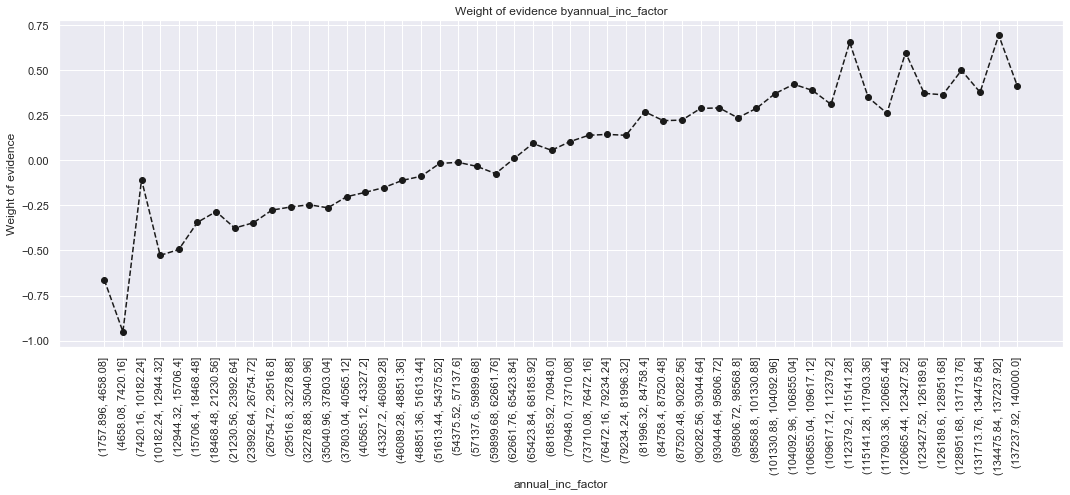

In [279]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [280]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [281]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  ...  \
0                (-0.188, 3.76]   5277   0.867728    0.030531   4579.0  ...   
1                  (3.76, 7.52]  11167   0.883406    0.064608   9865.0  ...   
2                 (7.52, 11.28]  13306   0.890050    0.076983  11843.0  ...   
3                (11.28, 15.04]  13216   0.884912    0.076462  11695.0  ...   
4                 (15.04, 18.8]   9337   0.891507    0.054020   8324.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.036483 -0.202695             NaN       NaN  inf  
1    0.068054 -0.058620        0.015679  0.144075  inf  
2    0.076469  0.007536        0.006643  0.066156  inf  
3    0.079500 -0.043919        0.005137  0.051454  inf  
4    0.052948  0.022515        0.006595  0.066433  inf  

[5 rows x 12 columns]

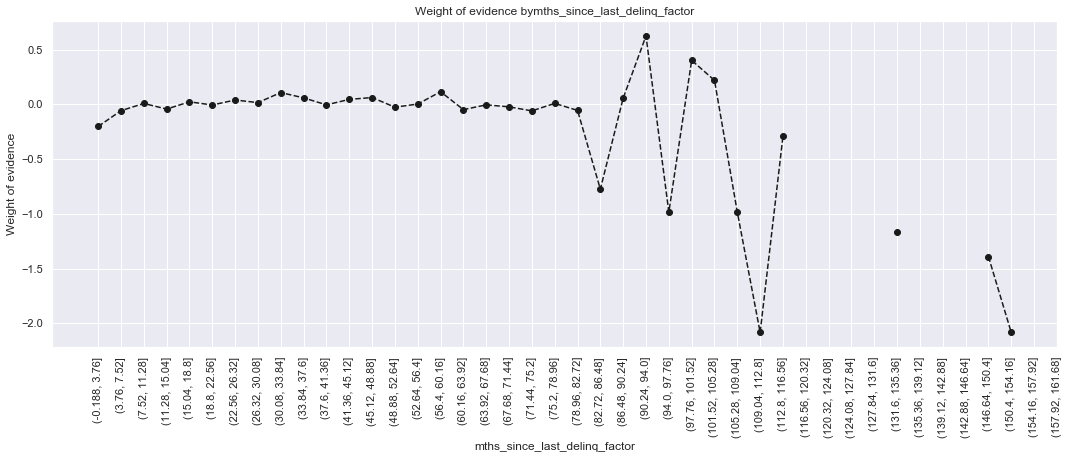

In [282]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [283]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3


In [284]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0  (-5243.882, 144693.64]  351904   0.885921    0.943372  311759.0  ...   
1  (144693.64, 287491.28]   19004   0.923016    0.050945   17541.0  ...   
2  (287491.28, 430288.92]    1525   0.927869    0.004088    1415.0  ...   
3  (430288.92, 573086.56]     332   0.939759    0.000890     312.0  ...   
4   (573086.56, 715884.2]     112   0.883929    0.000300      99.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.961350 -0.021283             NaN       NaN  inf  
1    0.035034  0.413036        0.037096  0.434319  inf  
2    0.002634  0.483389        0.004853  0.070353  inf  
3    0.000479  0.676255        0.011890  0.192866  inf  
4    0.000311 -0.040845        0.055830  0.717100  inf  

[5 rows x 12 columns]

50 classes are not enough to fine class annual income as more than 94% lies in first class

In [286]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0   (-5243.882, 73294.82]  231445   0.873231    0.620449  202105.0  ...   
1   (73294.82, 144693.64]  120459   0.910301    0.322922  109654.0  ...   
2  (144693.64, 216092.46]   15885   0.922694    0.042584   14657.0  ...   
3  (216092.46, 287491.28]    3119   0.924655    0.008361    2884.0  ...   
4   (287491.28, 358890.1]    1117   0.925694    0.002994    1034.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.702603 -0.141180             NaN       NaN  inf  
1    0.258747  0.246305        0.037070  0.387485  inf  
2    0.029407  0.408515        0.012393  0.162210  inf  
3    0.005628  0.436332        0.001961  0.027817  inf  
4    0.001988  0.451334        0.001038  0.015001  inf  

[5 rows x 12 columns]

In [287]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [288]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  ...  \
0   (1757.896, 4658.08]     15   0.800000    0.000043    12.0  ...   
1    (4658.08, 7420.16]     40   0.750000    0.000114    30.0  ...   
2   (7420.16, 10182.24]    287   0.874564    0.000818   251.0  ...   
3  (10182.24, 12944.32]    547   0.820841    0.001558   449.0  ...   
4   (12944.32, 15706.4]   1210   0.825620    0.003447   999.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000075 -0.663014             NaN       NaN  0.048053  
1    0.000250 -0.950696        0.050000  0.287682  0.048053  
2    0.000899 -0.107374        0.124564  0.843322  0.048053  
3    0.002446 -0.527253        0.053724  0.419879  0.048053  
4    0.005267 -0.494412        0.004779  0.032841  0.048053  

[5 rows x 12 columns]

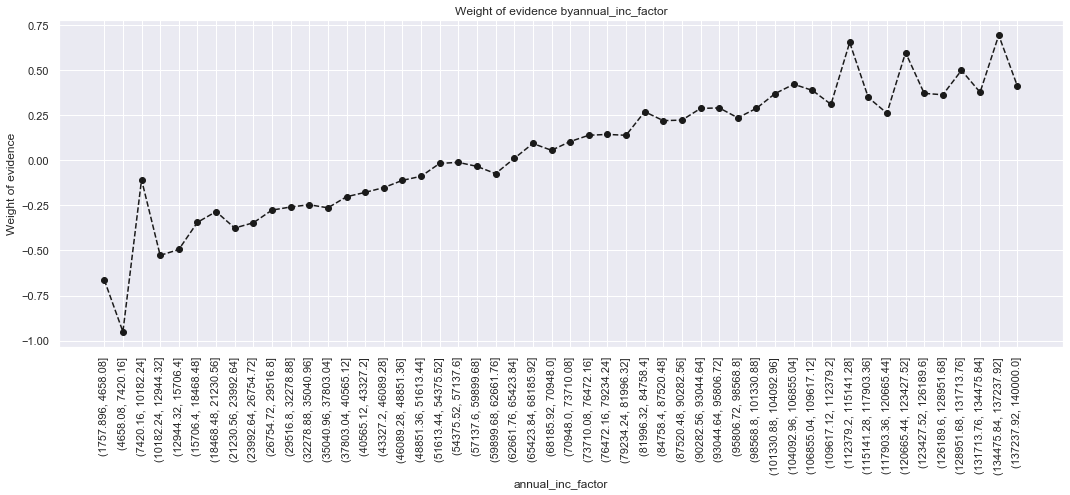

In [289]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

######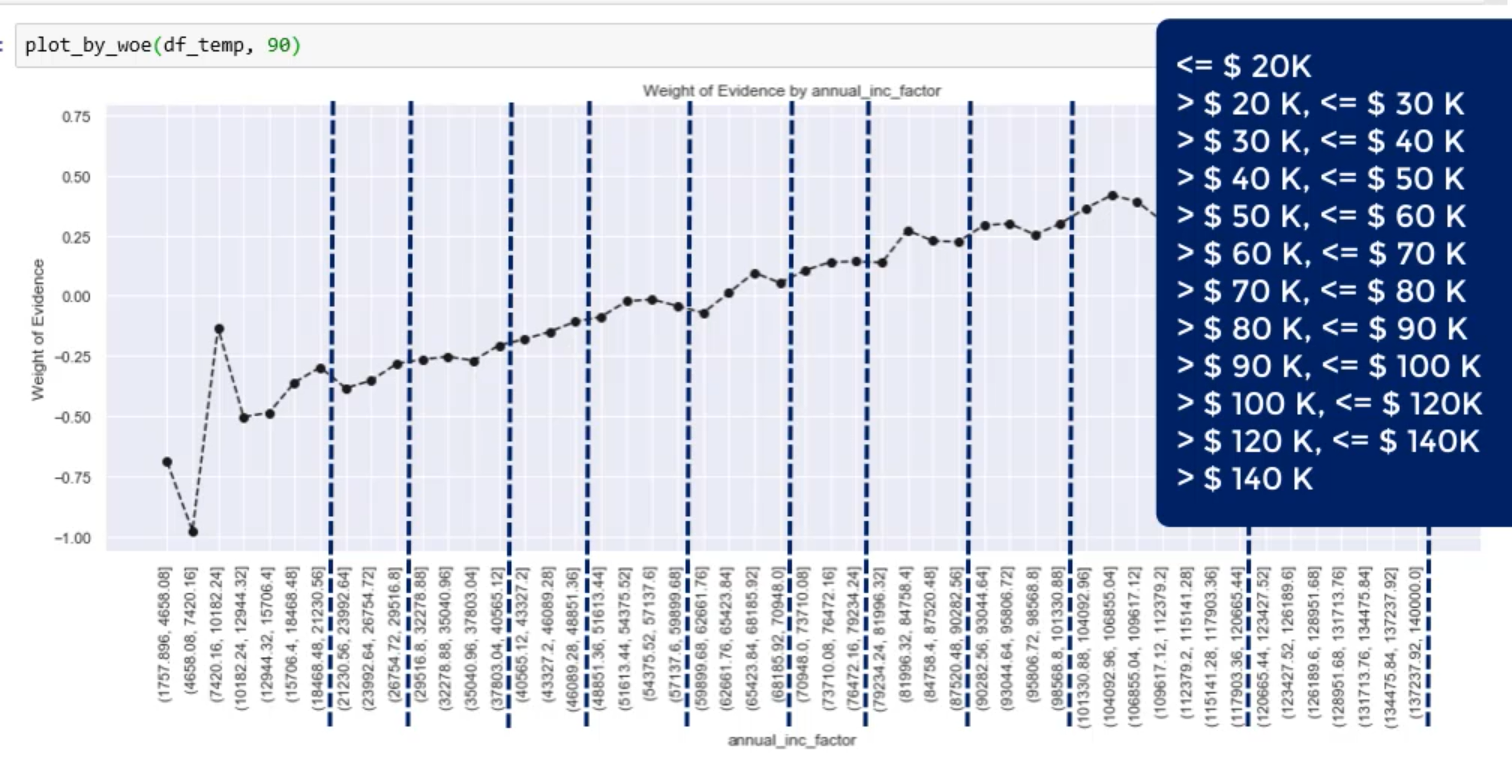

In [290]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [291]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  ...  \
0                (-0.188, 3.76]   5277   0.867728    0.030531   4579.0  ...   
1                  (3.76, 7.52]  11167   0.883406    0.064608   9865.0  ...   
2                 (7.52, 11.28]  13306   0.890050    0.076983  11843.0  ...   
3                (11.28, 15.04]  13216   0.884912    0.076462  11695.0  ...   
4                 (15.04, 18.8]   9337   0.891507    0.054020   8324.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.036483 -0.202695             NaN       NaN  inf  
1    0.068054 -0.058620        0.015679  0.144075  inf  
2    0.076469  0.007536        0.006643  0.066156  inf  
3    0.079500 -0.043919        0.005137  0.051454  inf  
4    0.052948  0.022515        0.006595  0.066433  inf  

[5 rows x 12 columns]

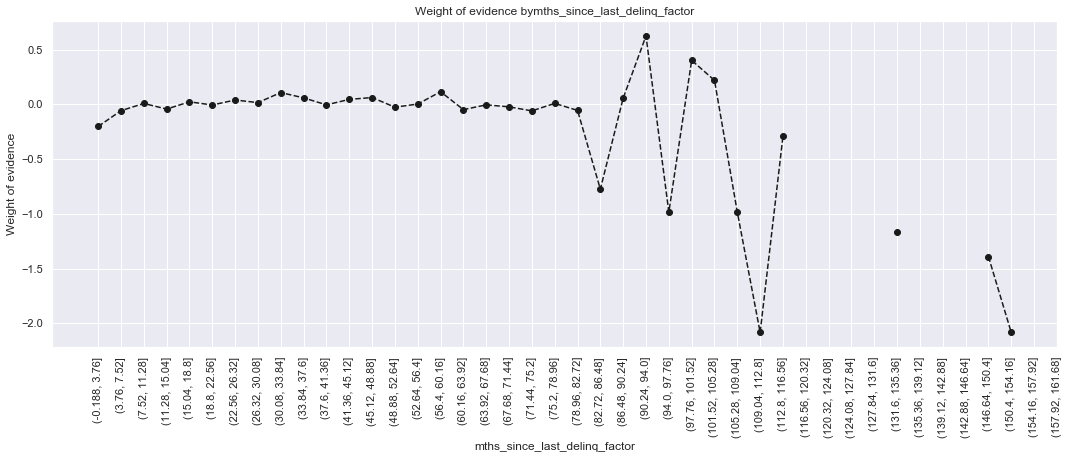

In [292]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [293]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [294]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

dti_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0  (-0.04, 0.4]    745   0.875168    0.001997   652.0  ...    0.002227   
1    (0.4, 0.8]    808   0.919554    0.002166   743.0  ...    0.001557   
2    (0.8, 1.2]    922   0.895879    0.002472   826.0  ...    0.002299   
3    (1.2, 1.6]   1043   0.896453    0.002796   935.0  ...    0.002586   
4    (1.6, 2.0]   1172   0.901877    0.003142  1057.0  ...    0.002754   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.123571             NaN       NaN  0.028323  
1  0.365293        0.044387  0.488864  0.028323  
2  0.081231        0.023676  0.284062  0.028323  
3  0.087400        0.000574  0.006169  0.028323  
4  0.147242        0.005425  0.059843  0.028323  

[5 rows x 12 columns]

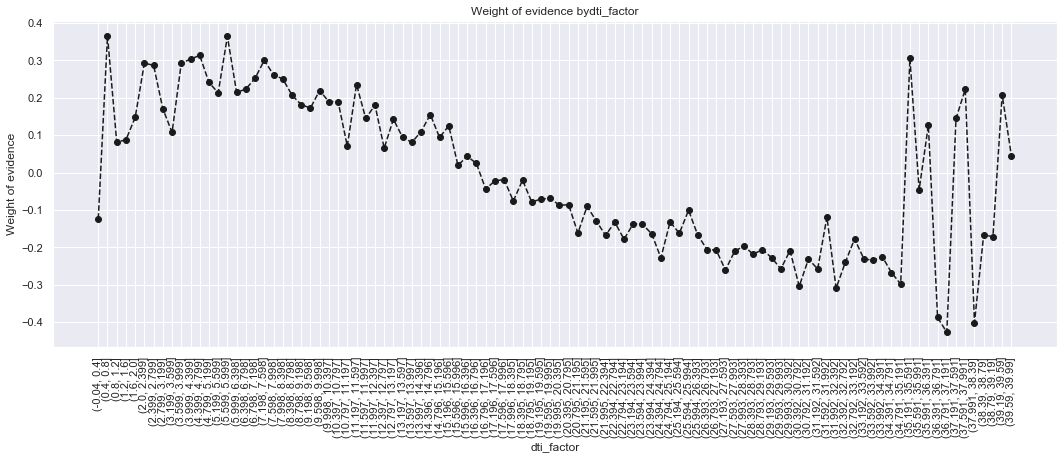

In [295]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [296]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [297]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dti_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0  (-0.035, 0.7]   1366   0.893851    0.003690  1221.0  ...    0.003501   
1     (0.7, 1.4]   1664   0.892428    0.004496  1485.0  ...    0.004322   
2     (1.4, 2.1]   1986   0.911883    0.005365  1811.0  ...    0.004225   
3     (2.1, 2.8]   2594   0.910563    0.007008  2362.0  ...    0.005601   
4     (2.8, 3.5]   3135   0.902073    0.008470  2828.0  ...    0.007412   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.059177             NaN       NaN  0.027235  
1  0.044269        0.001423  0.014907  0.027235  
2  0.265333        0.019455  0.221064  0.027235  
3  0.249012        0.001320  0.016322  0.027235  
4  0.148962        0.008489  0.100049  0.027235  

[5 rows x 12 columns]

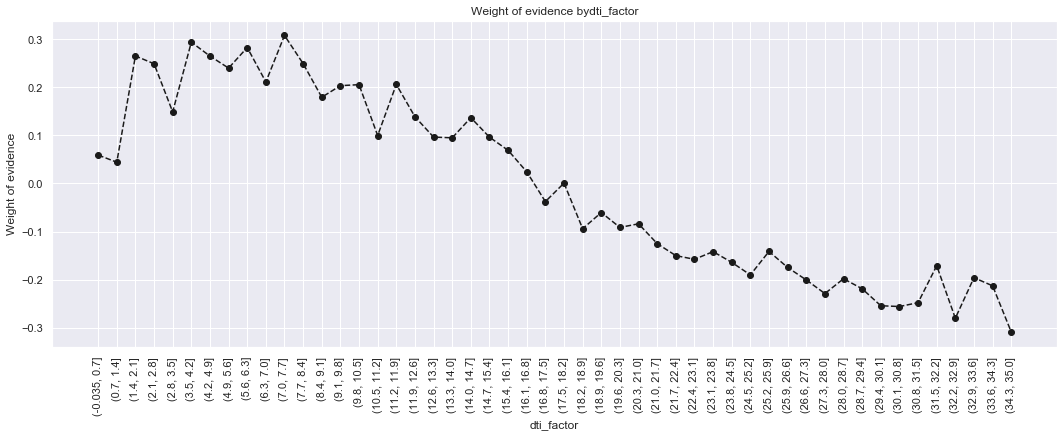

In [298]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [299]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [300]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  ...  \
0                (-0.121, 2.42]   1086   0.763352    0.021691   829.0  ...   
1                  (2.42, 4.84]     76   0.894737    0.001518    68.0  ...   
2                  (4.84, 7.26]    163   0.914110    0.003256   149.0  ...   
3                  (7.26, 9.68]    156   0.903846    0.003116   141.0  ...   
4                  (9.68, 12.1]    292   0.904110    0.005832   264.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.046449 -0.914379             NaN       NaN  0.075899  
1    0.001446  0.054543        0.131385  0.968922  0.075899  
2    0.002530  0.279366        0.019374  0.224823  0.075899  
3    0.002711  0.155187        0.010264  0.124179  0.075899  
4    0.005061  0.158222        0.000263  0.003035  0.075899  

[5 rows x 12 columns]

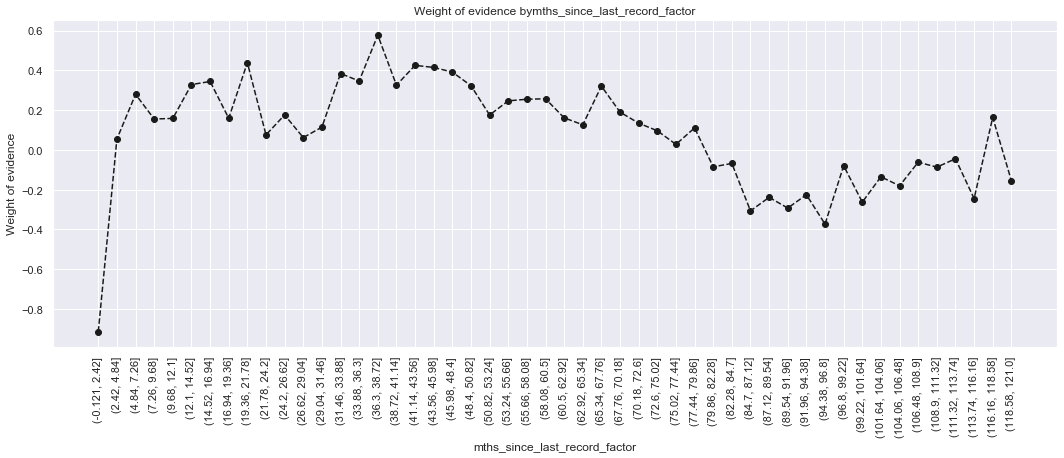

In [301]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [302]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [303]:
loan_data_inputs_train = df_inputs_prepr.copy()

In [304]:
loan_data_inputs_train.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  373028.000000  3.730280e+05  3.730280e+05  373028.000000   
mean   233050.214038  1.308110e+07  1.459914e+07   14318.314778   
std    134586.411795  1.089460e+07  1.168336e+07    8287.668197   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116448.750000  3.639984e+06  4.379781e+06    8000.000000   
50%    233085.500000  1.010677e+07  1.194003e+07   12000.000000   
75%    349508.250000  2.073958e+07  2.300367e+07   20000.000000   
max    466283.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  ...  mths_since_last_record:3-20  \
count  373028.000000  ...                373028.000000   
mean    14292.326514  ...                     0.004233   
std      8275.446272  ...                     0.064923   
min       500.000000  ...                     0.000000   
25%      8000.000000  ...                     0.000000   
50%     12000.000000  ...                     0.000000   
75%     20000.000000  ...                     0.000000   
max     35000.000000  ...                     1.000000   

       mths_since_last_record:21-31  mths_since_last_record:32-80  \
count                 373028.000000                 373028.000000   
mean                       0.005359                      0.060060   
std                        0.073008                      0.237598   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        0.000000                      0.000000   
max                        1.000000                      1.000000   

       mths_since_last_record:81-86  mths_since_last_record:>86  
count                 373028.000000               373028.000000  
mean                       0.006718                    0.054937  
std                        0.081688                    0.227857  
min                        0.000000                    0.000000  
25%                        0.000000                    0.000000  
50%                        0.000000                    0.000000  
75%                        0.000000                    0.000000  
max                        1.000000                    1.000000  

[8 rows x 290 columns]

## Preprocessing the Test Dataset

In [305]:
df_input_prep = loan_data_inputs_test
df_output_prep = loan_data_outputs_test

In [306]:
df_input_prep.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
362514      362514  19677589   21900299      32500        32500  ...   
288564      288564  29755527   32278795      11000        11000  ...   
213591      213591   1343334    1588314      30000        30000  ...   
263083      263083  33131681   35775007      14400        14400  ...   
165001      165001   3293168    4066358      15000        15000  ...   

        addr_state:WI addr_state:WV  addr_state:WY  initial_list_status:f  \
362514              0             0              0                      1   
288564              0             0              0                      0   
213591              0             0              0                      1   
263083              0             0              0                      0   
165001              0             0              0                      1   

       initial_list_status:w  
362514                     0  
288564                     1  
213591                     0  
263083                     1  
165001                     0  

[5 rows x 207 columns]

Dicrete Data Preprocessing
Dicrete variable is already categorical so here we have no need to calculate dummy variables using fine and coarse classing
Only calculate WOE and Information value to estimate if the variable can be included for predicting dependent variable

In [308]:
df_input_prep['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [309]:
df1 = pd.concat([df_input_prep['grade'],df_output_prep],axis=1)

In [310]:
df1.head()

grade  good/bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

In [311]:
df1.tail()

grade  good/bad
115        B         1
296284     B         1
61777      A         0
91763      A         1
167512     A         1

## Weight of evidence of discrete variable Grade

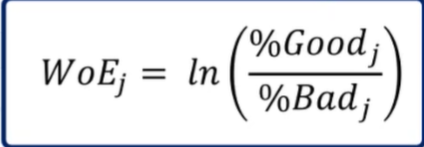

In [312]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good/bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [313]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good/bad
0     A  0.961213
1     B  0.921431
2     C  0.880150
3     D  0.840676
4     E  0.800980
5     F  0.769544
6     G  0.691617

In [314]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [315]:
df1.head()

grade  good/bad grade  good/bad
0     A     15108     A  0.961213
1     B     27199     B  0.921431
2     C     25048     C  0.880150
3     D     15390     D  0.840676
4     E      7145     E  0.800980

In [316]:
df1 = df1.iloc[:,[0,1,3]]

In [317]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [319]:
df1['no_good'] = df1['prop_good'] * df1['n_obs']
df1['no_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [320]:
df1['Final_good'] = df1['no_good']/df1['no_good'].sum()
df1['Final_bad'] = df1['no_bad']/df1['no_bad'].sum()

In [321]:
df1['WOE'] = np.log(df1['Final_good']/df1['Final_bad'])

In [322]:
df1

grade  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad       WOE
0     A  15108   0.961213  14522.0   586.0    0.175323   0.056200  1.137709
1     B  27199   0.921431  25062.0  2137.0    0.302572   0.204949  0.389558
2     C  25048   0.880150  22046.0  3002.0    0.266160   0.287906 -0.078539
3     D  15390   0.840676  12938.0  2452.0    0.156199   0.235159 -0.409127
4     E   7145   0.800980   5723.0  1422.0    0.069093   0.136377 -0.679963
5     F   2699   0.769544   2077.0   622.0    0.025075   0.059653 -0.866652
6     G    668   0.691617    462.0   206.0    0.005578   0.019756 -1.264703

In [323]:
df1 = df1.sort_values(['WOE'])

In [324]:
df1.head()

grade  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad       WOE
6     G    668   0.691617    462.0   206.0    0.005578   0.019756 -1.264703
5     F   2699   0.769544   2077.0   622.0    0.025075   0.059653 -0.866652
4     E   7145   0.800980   5723.0  1422.0    0.069093   0.136377 -0.679963
3     D  15390   0.840676  12938.0  2452.0    0.156199   0.235159 -0.409127
2     C  25048   0.880150  22046.0  3002.0    0.266160   0.287906 -0.078539

In [ ]:
df1.reset_index(drop=True)

In [326]:
df1['IV'] = (df1['Final_good']-df1['Final_bad']) * df1['WOE']

In [327]:
df1['IV'] = df1['IV'].sum()

In [328]:
df1.head()

grade  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad       WOE  \
6     G    668   0.691617    462.0   206.0    0.005578   0.019756 -1.264703   
5     F   2699   0.769544   2077.0   622.0    0.025075   0.059653 -0.866652   
4     E   7145   0.800980   5723.0  1422.0    0.069093   0.136377 -0.679963   
3     D  15390   0.840676  12938.0  2452.0    0.156199   0.235159 -0.409127   
2     C  25048   0.880150  22046.0  3002.0    0.266160   0.287906 -0.078539   

         IV  
6  0.301218  
5  0.301218  
4  0.301218  
3  0.301218  
2  0.301218

Grade Information value is 0.29 which comes under the bracket of 0.1-0.3
It means medium predictive power to obtain output variable

#### Function to calculate WOE

In [330]:
def woe_discrete(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['no_good'] = df['prop_good'] * df['n_obs']
    df['no_bad'] = (1- df['prop_good']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [331]:
df_temp=woe_discrete(df_input_prep,'grade',df_output_prep)

In [332]:
df_temp.head()

grade  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad       WOE  \
0     G    668   0.691617    462.0   206.0    0.005578   0.019756 -1.264703   
1     F   2699   0.769544   2077.0   622.0    0.025075   0.059653 -0.866652   
2     E   7145   0.800980   5723.0  1422.0    0.069093   0.136377 -0.679963   
3     D  15390   0.840676  12938.0  2452.0    0.156199   0.235159 -0.409127   
4     C  25048   0.880150  22046.0  3002.0    0.266160   0.287906 -0.078539   

         IV  
0  0.301218  
1  0.301218  
2  0.301218  
3  0.301218  
4  0.301218

#### Visualizing WOE for dicerete variables to interpret it

In [333]:
sns.set()

In [334]:
def plot_by_woe(df_woe,rotation_of_x_labels=0):
    x = np.array(df_woe.iloc[:,0].apply(str)) ## matplotlib works better with array than dataframes
    y = df_woe['WOE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_labels)

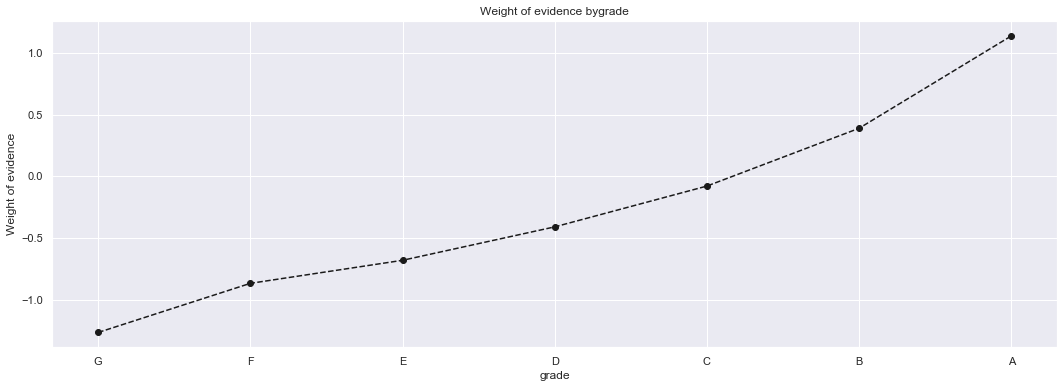

In [335]:
plot_by_woe(df_temp)

Keeping dummy variable G (grade) as reference
All other in regression model

##### Home Ownership Variable

In [337]:
df_input_prep.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
362514      362514  19677589   21900299      32500        32500  ...   
288564      288564  29755527   32278795      11000        11000  ...   
213591      213591   1343334    1588314      30000        30000  ...   
263083      263083  33131681   35775007      14400        14400  ...   
165001      165001   3293168    4066358      15000        15000  ...   

        addr_state:WI addr_state:WV  addr_state:WY  initial_list_status:f  \
362514              0             0              0                      1   
288564              0             0              0                      0   
213591              0             0              0                      1   
263083              0             0              0                      0   
165001              0             0              0                      1   

       initial_list_status:w  
362514                     0  
288564                     1  
213591                     0  
263083                     1  
165001                     0  

[5 rows x 207 columns]

In [338]:
df_home_owner=woe_discrete(df_input_prep,'home_ownership',df_output_prep)

In [339]:
df_home_owner.head()

home_ownership  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0          OTHER     45   0.777778     35.0    10.0    0.000423   0.000959   
1           NONE     10   0.800000      8.0     2.0    0.000097   0.000192   
2           RENT  37874   0.871495  33007.0  4867.0    0.398491   0.466769   
3            OWN   8409   0.885004   7442.0   967.0    0.089847   0.092740   
4       MORTGAGE  46919   0.902364  42338.0  4581.0    0.511143   0.439340   

        WOE        IV  
0 -0.819629  0.022264  
1 -0.686097  0.022264  
2 -0.158150  0.022264  
3 -0.031695  0.022264  
4  0.151376  0.022264

In [340]:
df_home_owner.tail()

home_ownership  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0          OTHER     45   0.777778     35.0    10.0    0.000423   0.000959   
1           NONE     10   0.800000      8.0     2.0    0.000097   0.000192   
2           RENT  37874   0.871495  33007.0  4867.0    0.398491   0.466769   
3            OWN   8409   0.885004   7442.0   967.0    0.089847   0.092740   
4       MORTGAGE  46919   0.902364  42338.0  4581.0    0.511143   0.439340   

        WOE        IV  
0 -0.819629  0.022264  
1 -0.686097  0.022264  
2 -0.158150  0.022264  
3 -0.031695  0.022264  
4  0.151376  0.022264

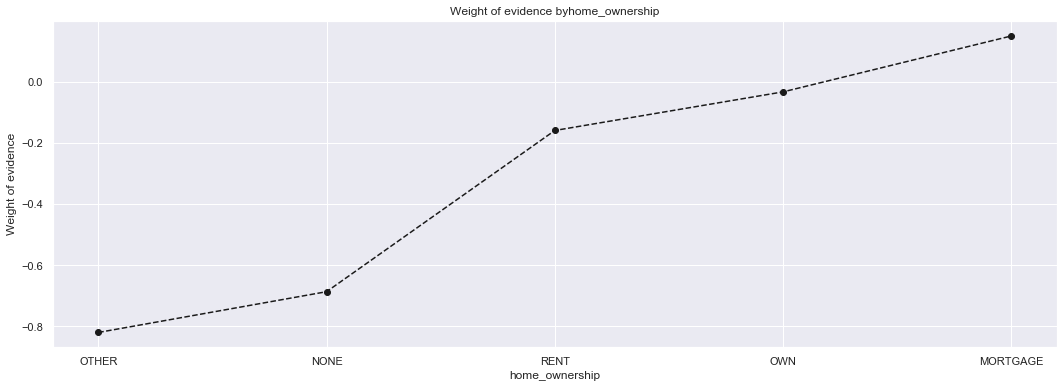

In [341]:
plot_by_woe(df_home_owner)

In [342]:
df_home_owner.head()

home_ownership  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0          OTHER     45   0.777778     35.0    10.0    0.000423   0.000959   
1           NONE     10   0.800000      8.0     2.0    0.000097   0.000192   
2           RENT  37874   0.871495  33007.0  4867.0    0.398491   0.466769   
3            OWN   8409   0.885004   7442.0   967.0    0.089847   0.092740   
4       MORTGAGE  46919   0.902364  42338.0  4581.0    0.511143   0.439340   

        WOE        IV  
0 -0.819629  0.022264  
1 -0.686097  0.022264  
2 -0.158150  0.022264  
3 -0.031695  0.022264  
4  0.151376  0.022264

in 2nd column(n_obs) it is clearly visible that OTHER, NONE and ANY has few values in the dataset, therefore it is less
WOE to predict loan default, but it is not good to delete those variables as those are most riskiest values
, better if we combine them to get good amount of information

For RENT also, WOE is very low so we can combine it with OTHER,NONE and ANY

In [344]:
df_input_prep['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_input_prep['home_ownership:OTHER'] ,df_input_prep['home_ownership:RENT'],
                                                          df_input_prep['home_ownership:NONE'],df_input_prep['home_ownership:ANY']])

From a set of categorical variables that represent one original independent variable, we make a reference category the 
category with lowest WOE value

#### address state discrete variable

In [346]:
df_input_prep['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [347]:
df_addr_state=woe_discrete(df_input_prep,'addr_state',df_output_prep)

C:\Users\TAN\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [348]:
df_addr_state.head()

addr_state  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0         NE      1   0.000000      0.0     1.0    0.000000   0.000096   
1         ID      2   0.500000      1.0     1.0    0.000012   0.000096   
2         NV   1298   0.854391   1109.0   189.0    0.013389   0.018126   
3         HI    486   0.855967    416.0    70.0    0.005022   0.006713   
4         AL   1182   0.867174   1025.0   157.0    0.012375   0.015057   

        WOE   IV  
0      -inf  inf  
1 -2.072392  inf  
2 -0.302925  inf  
3 -0.290202  inf  
4 -0.196190  inf

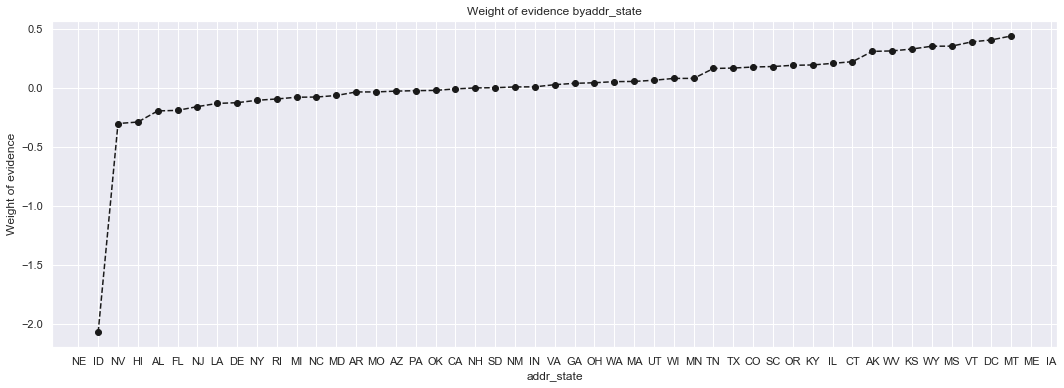

In [349]:
plot_by_woe(df_addr_state)

In [350]:
if ['addr_state:ND'] in df_input_prep.columns.values:
    pass
else:
    df_input_prep['addr_state:ND'] = 0

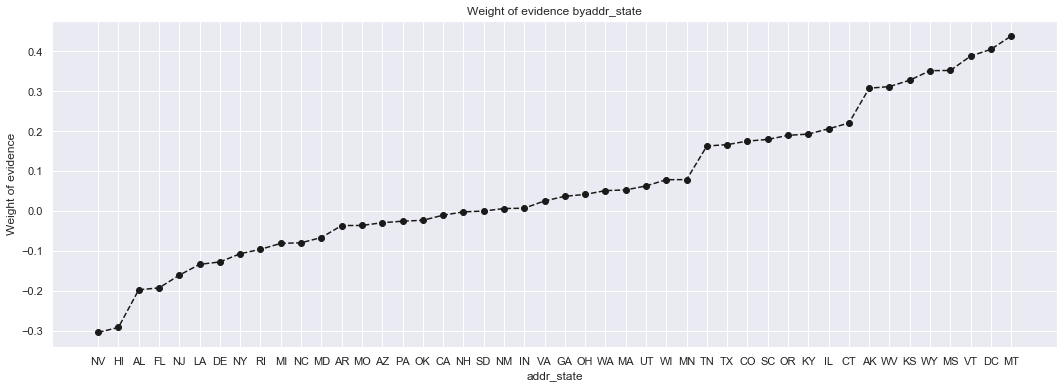

In [351]:
plot_by_woe(df_addr_state.iloc[2:-2,:])

Earlier first two and last two states were making us believe that all states from NV to DC wee kind of similar but ideally 
it is not

Combine NE, IA, NV, FL, Al, HI based on WOE and number of observation, all of these are having worst borrowers , WOE is lowest
Being conservative, add ND(North Dakota earlier not in the list) also in this category

Last four WV,NH,WY,DC and ME,ID are having good borrowers -combine them

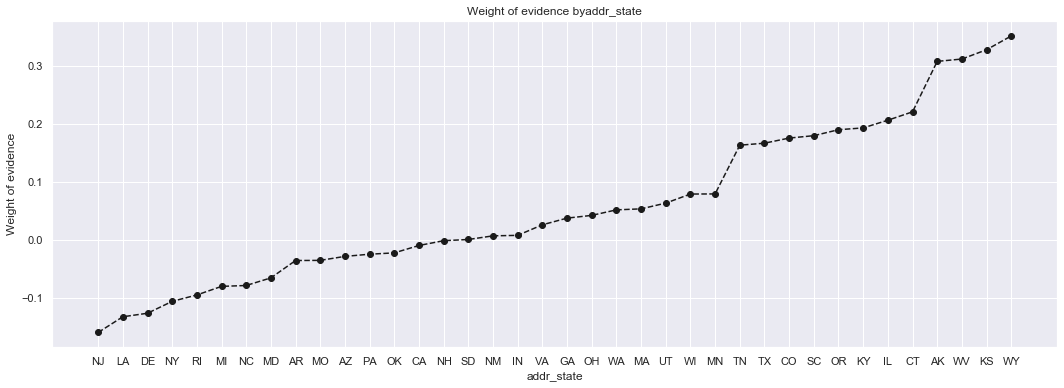

In [355]:
plot_by_woe(df_addr_state.iloc[6:-6,:])

VA,NM,NY,TN,MO,LA,OK,NC,MD,CA have similar WOE
However NY and CA have many borrowers so they will be a seperate dummy variable

Final categories from VA to CA will be;
1. VA,NM
2. NY
3. TN,MO,LA,OK,NC,MA
4. CA

In [358]:
### THEN UT,NJ,AZ,KY

#### 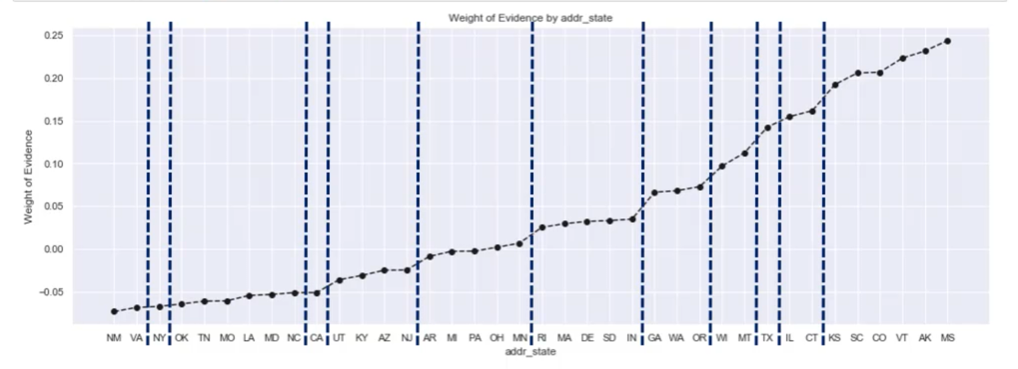

In [359]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.
df_inputs_prepr = df_input_prep.copy()

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [361]:
df_inputs_prepr.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
362514      362514  19677589   21900299      32500        32500  ...   
288564      288564  29755527   32278795      11000        11000  ...   
213591      213591   1343334    1588314      30000        30000  ...   
263083      263083  33131681   35775007      14400        14400  ...   
165001      165001   3293168    4066358      15000        15000  ...   

        addr_state:GA_WA_OR addr_state:WI_MT  addr_state:IL_CT  \
362514                    0                0                 0   
288564                    0                0                 0   
213591                    0                0                 0   
263083                    0                0                 0   
165001                    0                0                 0   

        addr_state:KS_SC_CO_VT_AK_MS addr_state:WV_NH_WY_DC_ME_ID  
362514                             0                            0  
288564                             0                            0  
213591                             0                            0  
263083                             0                            0  
165001                             0                            0  

[5 rows x 220 columns]

#### verification status discrete variable

In [362]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [363]:
df_verification_status=woe_discrete(df_input_prep,'verification_status',df_output_prep)

In [364]:
df_verification_status.head()

verification_status  n_obs  prop_good  no_good  no_bad  Final_good  \
0            Verified  33641   0.869653  29256.0  4385.0    0.353205   
1     Source Verified  29963   0.892567  26744.0  3219.0    0.322878   
2        Not Verified  29653   0.904799  26830.0  2823.0    0.323916   

   Final_bad       WOE        IV  
0   0.420543 -0.174497  0.021921  
1   0.308718  0.044848  0.021921  
2   0.270739  0.179329  0.021921

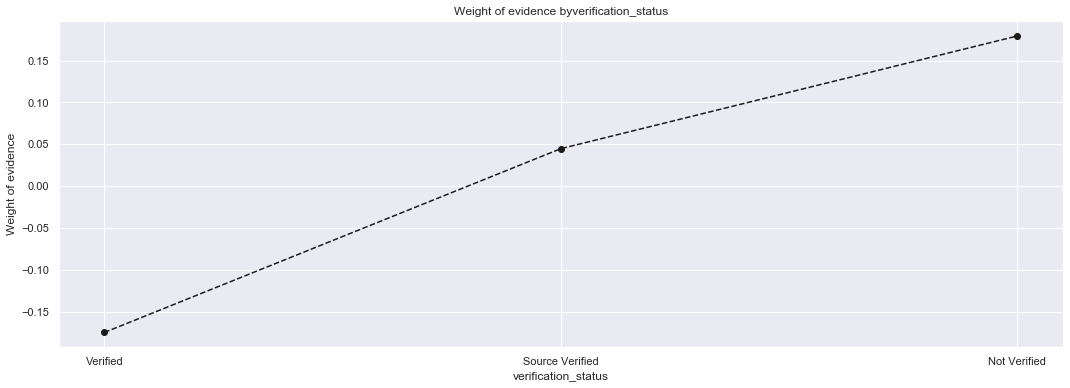

In [365]:
plot_by_woe(df_verification_status)

#### purpose discrete variable

In [366]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'vacation', 'house', 'medical', 'small_business', 'car', 'other',
       'major_purchase', 'wedding', 'moving', 'educational',
       'renewable_energy'], dtype=object)

In [367]:
df_purpose=woe_discrete(df_input_prep,'purpose',df_output_prep)

In [368]:
df_purpose.head()

purpose  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0       educational     89   0.752809     67.0    22.0    0.000809   0.002110   
1  renewable_energy     70   0.771429     54.0    16.0    0.000652   0.001534   
2    small_business   1431   0.774284   1108.0   323.0    0.013377   0.030977   
3           medical    918   0.855120    785.0   133.0    0.009477   0.012755   
4             other   4806   0.858302   4125.0   681.0    0.049801   0.065311   

        WOE        IV  
0 -0.958742  0.044698  
1 -0.855996  0.044698  
2 -0.839732  0.044698  
3 -0.297057  0.044698  
4 -0.271133  0.044698

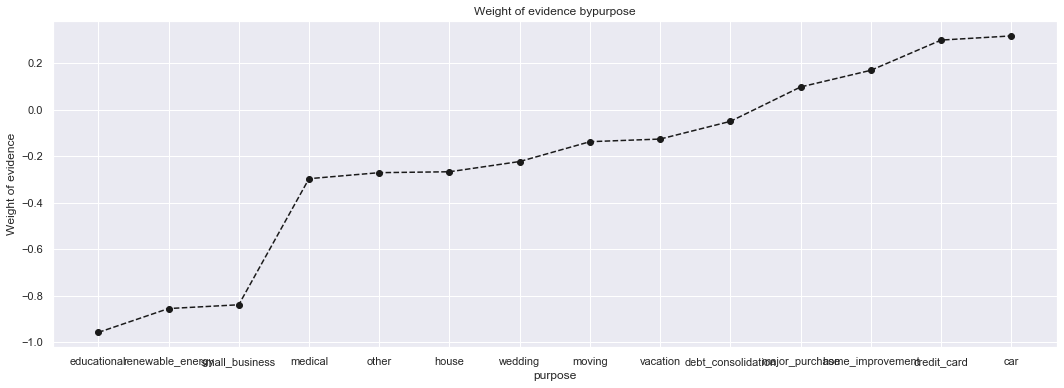

In [369]:
plot_by_woe(df_purpose)

In [370]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [371]:
# 'initial_list_status'
df_initial_list_status = woe_discrete(df_inputs_prepr, 'initial_list_status', df_output_prep)
df_initial_list_status

initial_list_status  n_obs  prop_good  no_good  no_bad  Final_good  \
0                   f  60491   0.877602  53087.0  7404.0    0.640915   
1                   w  32766   0.907740  29743.0  3023.0    0.359085   

   Final_bad       WOE        IV  
0    0.71008 -0.102480  0.021886  
1    0.28992  0.213952  0.021886

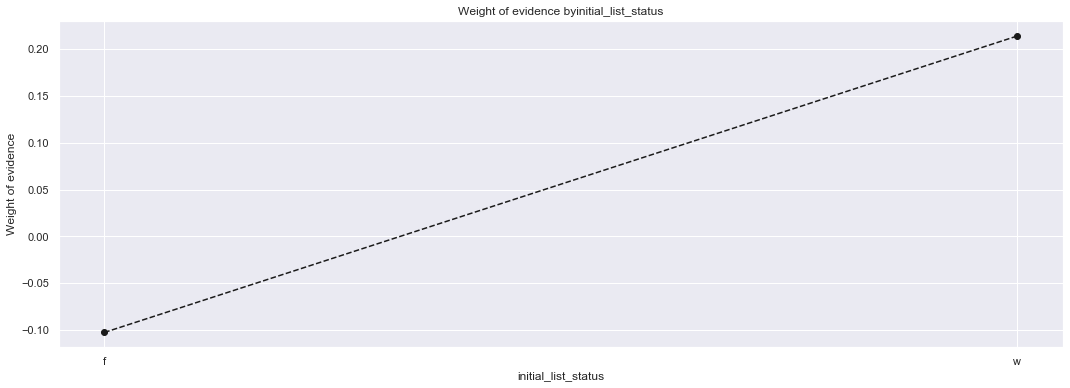

In [372]:
plot_by_woe(df_initial_list_status)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

When we calculate and plot the weights of evidence of continuous variables categories, what do we sort them by their own
values in ascending order

In [139]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [140]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [141]:
df_term_int = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_output_prep)
# We calculate weight of evidence.
df_term_int

term_int   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0        36  270419   0.900706    0.724929  243568.0  ...    0.642999   
1        60  102609   0.854711    0.275071   87701.0  ...    0.357001   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.134077             NaN       NaN  0.039953  
1 -0.298980        0.045995  0.433058  0.039953  

[2 rows x 12 columns]

In [142]:
def plot_by_woe(df_woe,rotation_of_x_labels=0):
    x = np.array(df_woe.iloc[:,0].apply(str)) ## matplotlib works better with array than dataframes
    y = df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_labels)

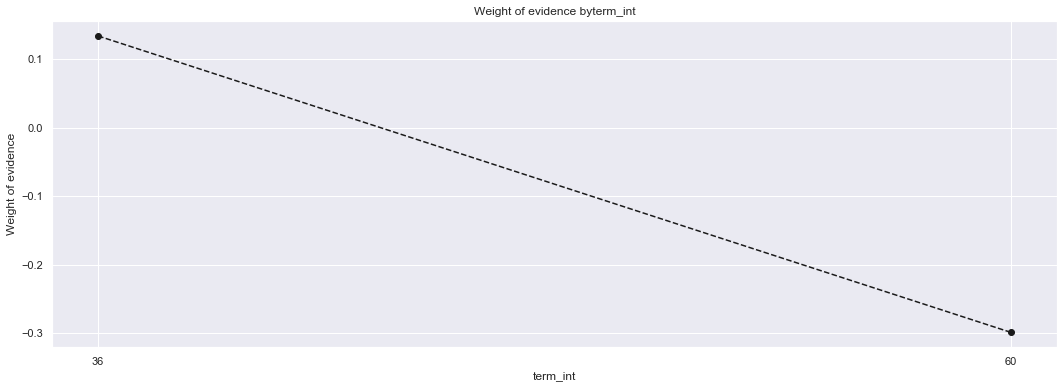

In [143]:
plot_by_woe(df_term_int)
# We plot the weight of evidence values.

In [144]:
##emp_length_int

In [145]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [146]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [147]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

emp_length_int  n_obs  prop_good  prop_n_obs   n_good  ...  prop_n_bad  \
0             0.0  45720   0.873250    0.122565  39925.0  ...    0.138772   
1             1.0  23654   0.884417    0.063411  20920.0  ...    0.065471   
2             2.0  33078   0.888204    0.088674  29380.0  ...    0.088556   
3             3.0  29205   0.888067    0.078292  25936.0  ...    0.078283   
4             4.0  22468   0.887662    0.060231  19944.0  ...    0.060442   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.141009             NaN       NaN  0.006448  
1 -0.036076        0.011167  0.104933  0.006448  
2  0.001506        0.003787  0.037582  0.006448  
3  0.000132        0.000137  0.001374  0.006448  
4 -0.003932        0.000405  0.004064  0.006448  

[5 rows x 12 columns]

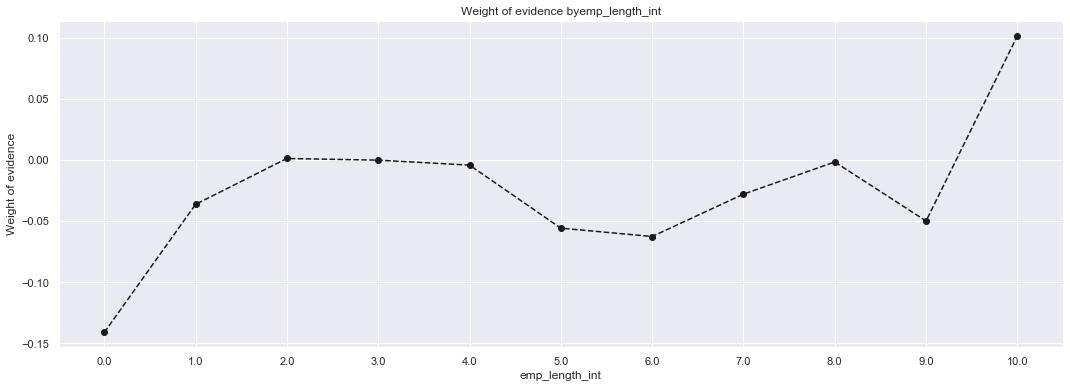

In [148]:
plot_by_woe(df_temp)

In [149]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [150]:
## months since issue

In [151]:
df_inputs_prepr.head(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   
412305      412305  13827698   15890016      17200        17200  ...   
36159        36159    422455     496525       8400         8400  ...   

        emp_length:1 emp_length:2-4  emp_length:5-6  emp_length:7-9  \
427211             0              1               0               0   
206088             0              0               1               0   
136020             0              0               0               0   
412305             0              0               0               1   
36159              0              0               1               0   

       emp_length:10  
427211             0  
206088             0  
136020             1  
412305             0  
36159              0  

[5 rows x 228 columns]

In [152]:
df_inputs_prepr.mths_since_issue.unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [153]:
### Fine classing of continous or discrete high ordered variable

In [154]:
df_inputs_prepr['mths_since_issue'] = pd.cut(df_inputs_prepr['mths_since_issue'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [155]:
df_inputs_prepr.mths_since_issue.unique()

[(43.2, 45.0], (63.0, 64.8], (52.2, 54.0], (100.8, 102.6], (35.91, 37.8], ..., (99.0, 100.8], (120.6, 122.4], (106.2, 108.0], (122.4, 124.2], (108.0, 109.8]]
Length: 50
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [156]:
df_inputs_prepr['mths_since_issue']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [157]:
# mths_since_issue_d
df_mnths_since_issue = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue', df_output_prep)
# We calculate weight of evidence.
df_mnths_since_issue.head()

mths_since_issue  n_obs  prop_good  prop_n_obs   n_good  ...  prop_n_bad  \
0    (35.91, 37.8]  28170   0.938942    0.075517  26450.0  ...    0.041189   
1     (37.8, 39.6]  39636   0.923958    0.106255  36622.0  ...    0.072176   
2     (39.6, 41.4]  38614   0.913477    0.103515  35273.0  ...    0.080007   
3     (41.4, 43.2]  29038   0.904573    0.077844  26267.0  ...    0.066357   
4     (43.2, 45.0]  28367   0.898720    0.076045  25494.0  ...    0.068800   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.661916             NaN       NaN  0.100891  
1  0.426365        0.014984  0.235551  0.100891  
2  0.285832        0.010481  0.140533  0.100891  
3  0.178089        0.008904  0.107743  0.100891  
4  0.112071        0.005853  0.066019  0.100891  

[5 rows x 12 columns]

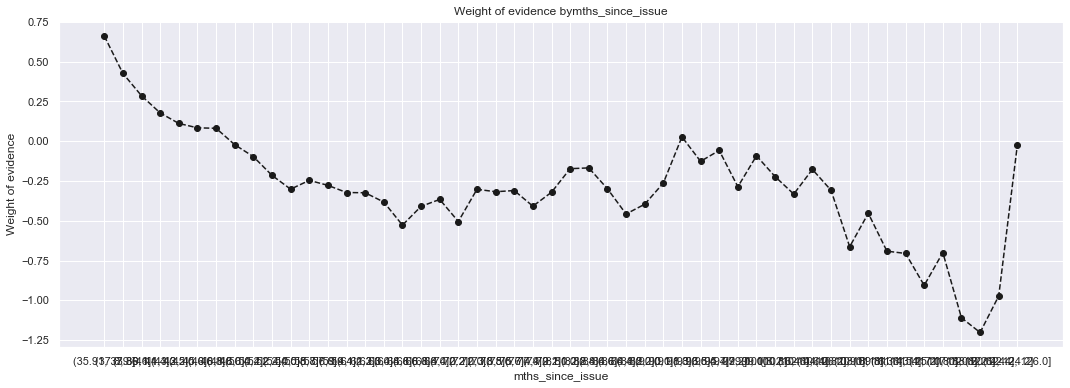

In [158]:
plot_by_woe(df_mnths_since_issue)

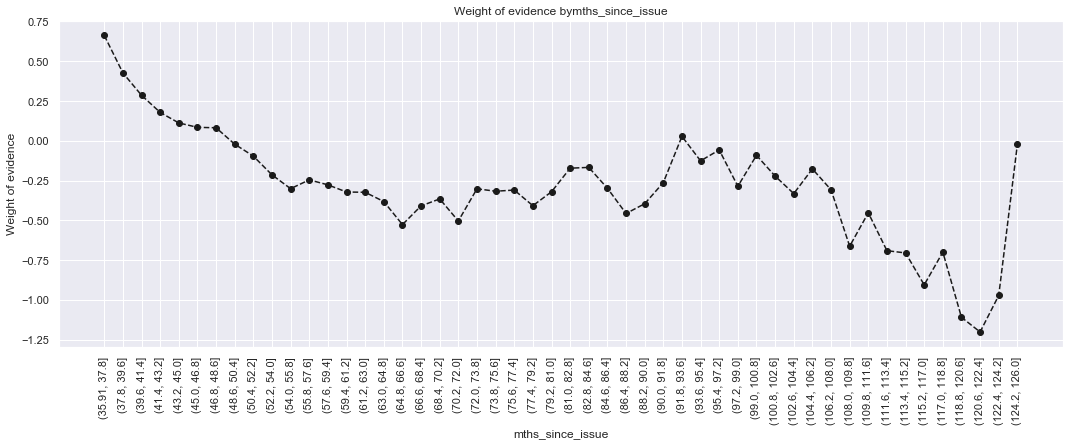

In [159]:
plot_by_woe(df_mnths_since_issue,rotation_of_x_labels=90)

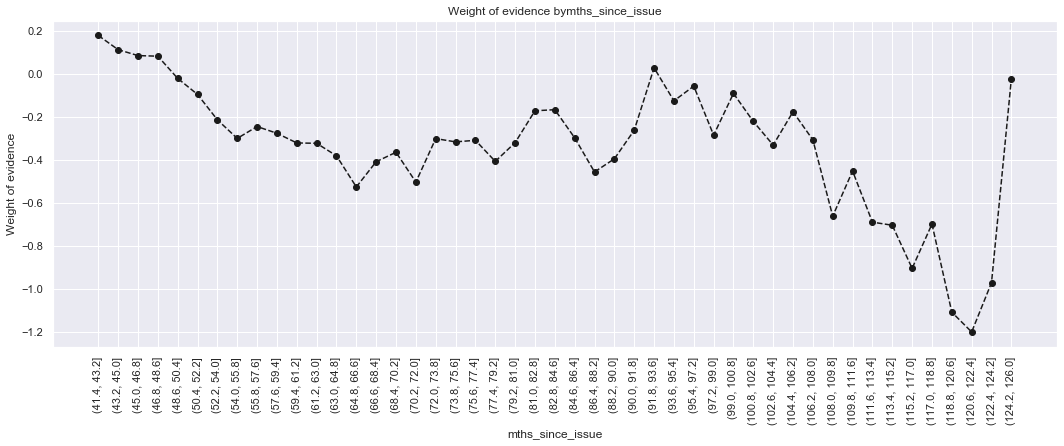

In [160]:
plot_by_woe(df_mnths_since_issue.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [161]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue'].isin(range(85, 127)), 1, 0)

In [162]:
df_inputs_prepr['int_rate'].unique()

array([ 8.9 , 14.33, 16.59, 12.84,  7.49, 10.62, 20.31,  9.17, 15.31,
       16.49,  9.67, 15.8 , 13.65, 14.64, 22.15, 12.49, 10.15, 18.55,
       11.14, 10.64, 15.1 , 16.29, 17.57, 13.67, 11.99, 16.2 , 15.61,
       16.99,  7.12, 12.99, 12.12, 16.78, 11.67, 13.35,  7.51, 18.25,
       10.59, 13.99, 23.1 ,  6.03, 14.16, 13.11, 20.99, 22.2 , 10.99,
       18.85, 19.52, 23.83, 22.45,  7.69, 20.2 ,  6.62, 11.86, 14.09,
       18.49,  9.99,  7.9 , 14.3 , 13.98,  7.62, 21.  , 16.89, 17.19,
       11.55, 16.07, 10.65, 18.75, 18.92, 14.49, 17.14,  8.49, 13.61,
        6.49, 15.59,  9.71, 18.64, 17.27, 12.69, 14.72, 23.7 , 10.37,
        6.92, 10.95, 10.36, 12.35, 19.91, 12.53, 25.8 , 17.77, 11.44,
       17.76, 24.08, 19.2 , 17.56, 19.99,  8.39, 10.16, 18.99,  9.76,
       22.47, 14.99, 13.05,  6.17, 17.1 , 11.11, 18.54, 13.66, 14.31,
       11.71, 20.5 , 14.47, 14.98, 19.72, 13.49,  7.88, 14.65, 15.22,
       13.48, 14.54, 17.99,  6.54, 21.18, 11.12, 12.85, 14.82, 23.43,
       13.43, 16.24,

### Fine classing

In [163]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [164]:
df_inputs_prepr['int_rate_factor'].unique()

[(8.722, 9.135], (14.089, 14.502], (16.566, 16.978], (12.438, 12.85], (7.484, 7.897], ..., (21.519, 21.932], (24.409, 24.822], (25.234, 25.647], (5.399, 5.833], (24.822, 25.234]]
Length: 50
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [165]:
df_inputs_prepr['int_rate_factor'].head()

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
Name: int_rate_factor, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [166]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0  (5.399, 5.833]    785   0.961783    0.002104   755.0  ...    0.000718   
1  (5.833, 6.246]   8459   0.979667    0.022677  8287.0  ...    0.004119   
2  (6.246, 6.658]   7826   0.970994    0.020980  7599.0  ...    0.005436   
3  (6.658, 7.071]   1816   0.973018    0.004868  1767.0  ...    0.001173   
4  (7.071, 7.484]   3143   0.976137    0.008426  3068.0  ...    0.001796   

        WoE  diff_prop_good  diff_WoE        IV  
0  1.154505             NaN       NaN  0.344154  
1  1.803933        0.017883  0.649428  0.344154  
2  1.439806        0.008673  0.364127  0.344154  
3  1.514202        0.002023  0.074396  0.344154  
4  1.640277        0.003120  0.126075  0.344154  

[5 rows x 12 columns]

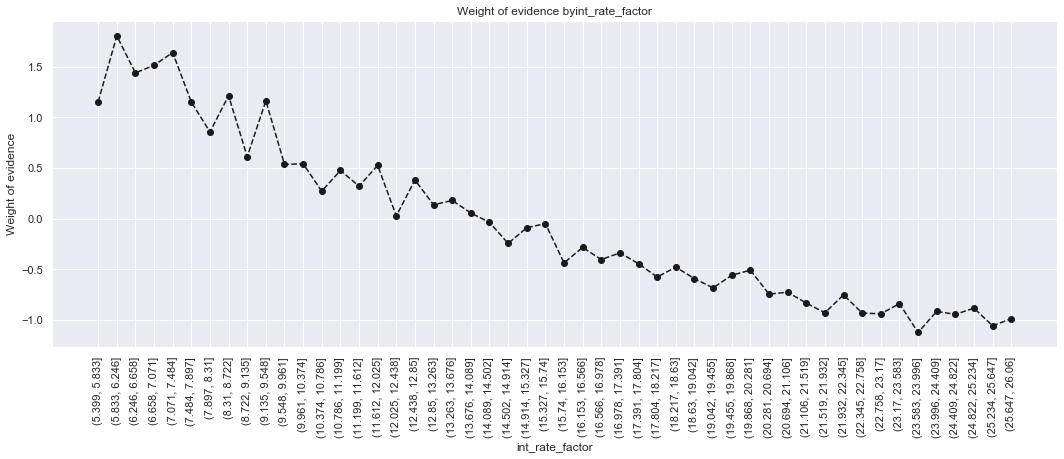

In [167]:
plot_by_woe(df_temp,rotation_of_x_labels=90)

In [168]:
#### greater the interest rate, lower the WOE and higher the probability of default (riskier)

In [169]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [170]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [171]:
df_inputs_prepr.head(3)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  ...  \
427211      427211  12796369   14818505      24000        24000  ...   
206088      206088   1439740    1691948      10000        10000  ...   
136020      136020   5214749    6556909      20425        20425  ...   

        int_rate:<9.548 int_rate:9.548-12.025  int_rate:12.025-15.74  \
427211                1                     0                      0   
206088                0                     0                      1   
136020                1                     0                      0   

        int_rate:15.74-20.281 int_rate:>20.281  
427211                      0                0  
206088                      0                0  
136020                      0                0  

[3 rows x 242 columns]

In [172]:
df_inputs_prepr['funded_amnt'].unique()

array([24000, 10000, 20425, ..., 34650, 32775,   950], dtype=int64)

In [173]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0    (465.5, 1190.0]   1224   0.904412    0.003281  1107.0  ...    0.002802   
1   (1190.0, 1880.0]   3028   0.903236    0.008117  2735.0  ...    0.007016   
2   (1880.0, 2570.0]   6018   0.891825    0.016133  5367.0  ...    0.015589   
3   (2570.0, 3260.0]   7248   0.886451    0.019430  6425.0  ...    0.019708   
4   (3260.0, 3950.0]   4751   0.889286    0.012736  4225.0  ...    0.012596   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.176219             NaN       NaN  0.014241  
1  0.162698        0.001175  0.013521  0.014241  
2  0.038499        0.011412  0.124199  0.014241  
3 -0.016020        0.005373  0.054519  0.014241  
4  0.012458        0.002835  0.028478  0.014241  

[5 rows x 12 columns]

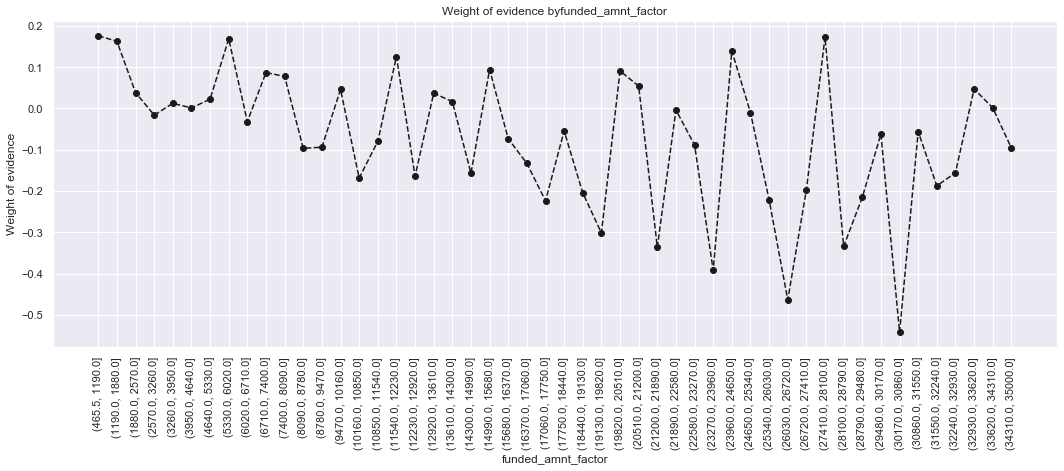

In [174]:
plot_by_woe(df_temp,rotation_of_x_labels=90)

In [175]:
### No need to inlude funded amount in the pD model as WOE is independent of the WOE

### Data Preparation: Continuous Variables, Part 1 and 2

In [176]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                    (-0.587, 11.74]     24      0.875    0.000064    21.0   
1                     (11.74, 23.48]      0        NaN    0.000000     NaN   
2                     (23.48, 35.22]      0        NaN    0.000000     NaN   
3                     (35.22, 46.96]      0        NaN    0.000000     NaN   
4                      (46.96, 58.7]      0        NaN    0.000000     NaN   

   ...  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0  ...    0.000072 -0.125106             NaN       NaN  0.016285  
1  ...         NaN       NaN             NaN       NaN  0.016285  
2  ...         NaN       NaN             NaN       NaN  0.016285  
3  ...         NaN       NaN             NaN       NaN  0.016285  
4  ...         NaN       NaN             NaN       NaN  0.016285  

[5 rows x 12 columns]

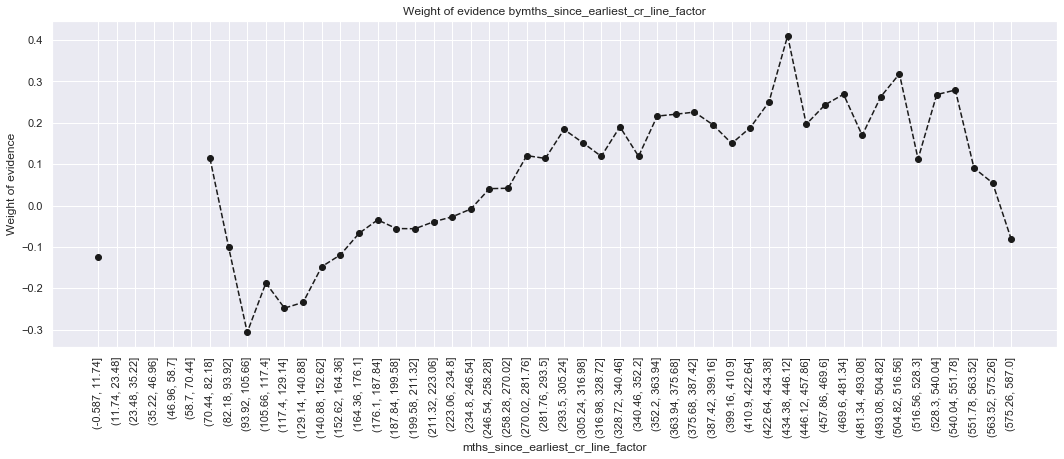

In [177]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

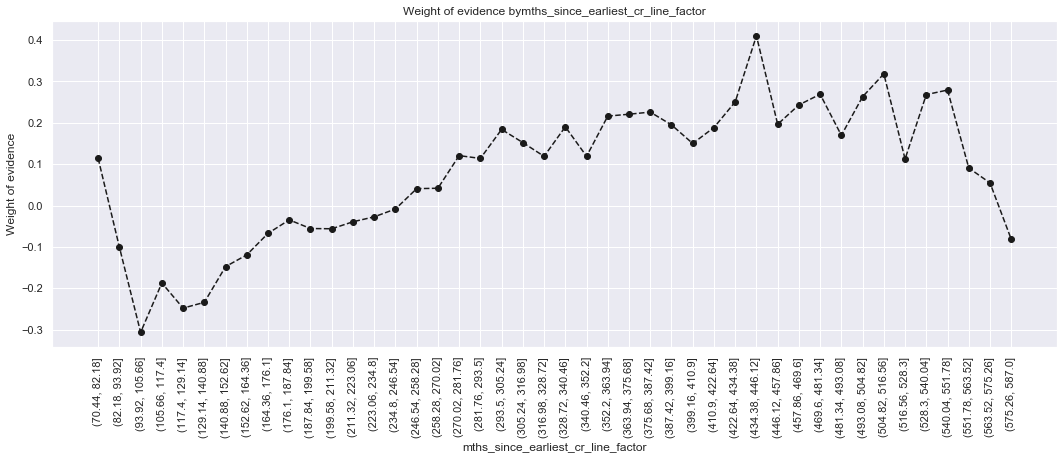

In [178]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [179]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [180]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0          0.0  306417   0.888097    0.821432  272128.0  ...    0.821116   
1          1.0   44927   0.889955    0.120439   39983.0  ...    0.118394   
2          2.0   13118   0.884662    0.035166   11605.0  ...    0.036232   
3          3.0    4550   0.879341    0.012197    4001.0  ...    0.013147   
4          4.0    1868   0.893469    0.005008    1669.0  ...    0.004765   

        WoE  diff_prop_good  diff_WoE   IV  
0  0.000432             NaN       NaN  inf  
1  0.019264        0.001858  0.018832  inf  
2 -0.033674        0.005293  0.052938  inf  
3 -0.084815        0.005322  0.051140  inf  
4  0.055659        0.014128  0.140474  inf  

[5 rows x 12 columns]

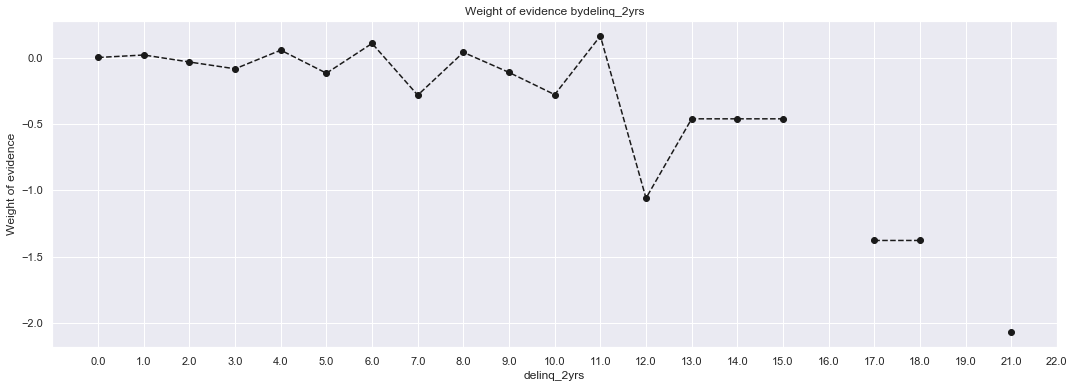

In [181]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [182]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [183]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0             0.0  193232   0.905942    0.518009  175057.0  ...    0.435236   
1             1.0  104163   0.882213    0.279236   91894.0  ...    0.293805   
2             2.0   46214   0.861406    0.123889   39809.0  ...    0.153380   
3             3.0   20040   0.836826    0.053723   16770.0  ...    0.078306   
4             4.0    5810   0.844062    0.015575    4904.0  ...    0.021696   

        WoE  diff_prop_good  diff_WoE   IV  
0  0.194049             NaN       NaN  inf  
1 -0.057456        0.023729  0.251505  inf  
2 -0.244002        0.020808  0.186546  inf  
3 -0.436214        0.024579  0.192212  inf  
4 -0.382249        0.007236  0.053966  inf  

[5 rows x 12 columns]

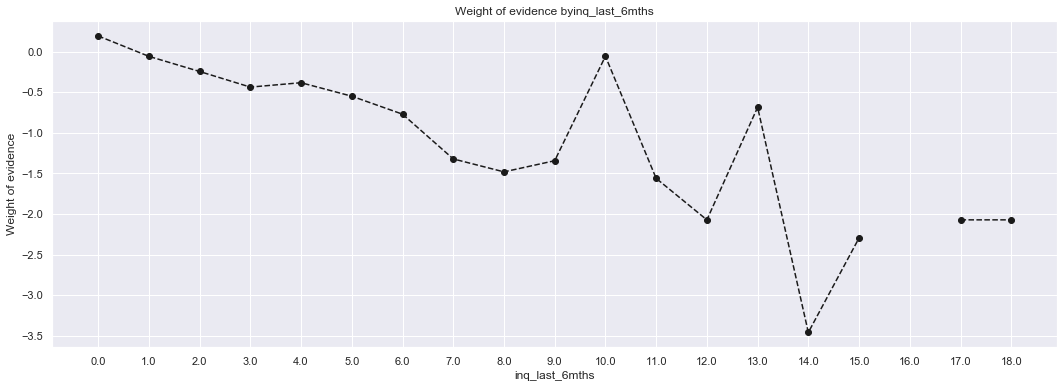

In [184]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [185]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [186]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

open_acc  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad       WoE  \
0       0.0     29   0.758621    0.000078    22.0  ...    0.000168 -0.925883   
1       1.0    110   0.872727    0.000295    96.0  ...    0.000335 -0.145725   
2       2.0   1456   0.844780    0.003903  1230.0  ...    0.005412 -0.376781   
3       3.0   4378   0.872545    0.011736  3820.0  ...    0.013362 -0.147369   
4       4.0  10028   0.889609    0.026883  8921.0  ...    0.026509  0.015739   

   diff_prop_good  diff_WoE   IV  
0             NaN       NaN  inf  
1        0.114107  0.780159  inf  
2        0.027947  0.231056  inf  
3        0.027764  0.229412  inf  
4        0.017065  0.163108  inf  

[5 rows x 12 columns]

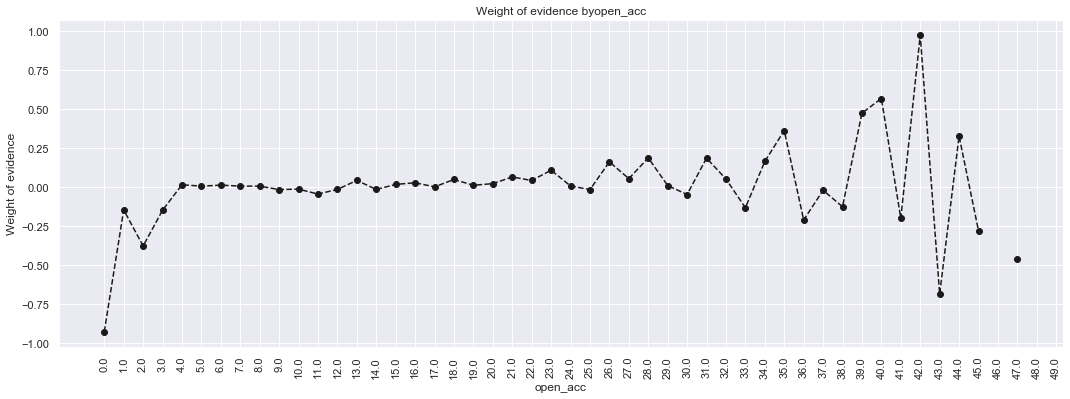

In [187]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

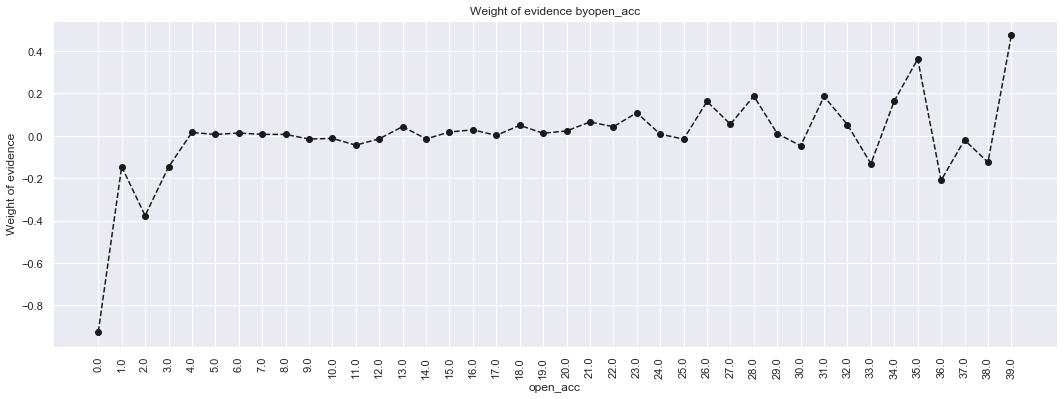

In [188]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [189]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [190]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

pub_rec   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0      0.0  323999   0.887416    0.868565  287522.0  ...    0.873512   
1      1.0   42381   0.890328    0.113613   37733.0  ...    0.111305   
2      2.0    4527   0.897504    0.012136    4063.0  ...    0.011111   
3      3.0    1280   0.916406    0.003431    1173.0  ...    0.002562   
4      4.0     408   0.921569    0.001094     376.0  ...    0.000766   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.006398             NaN       NaN  inf  
1  0.023082        0.002912  0.029481  inf  
2  0.098777        0.007176  0.075694  inf  
3  0.323475        0.018902  0.224699  inf  
4  0.392838        0.005162  0.069362  inf  

[5 rows x 12 columns]

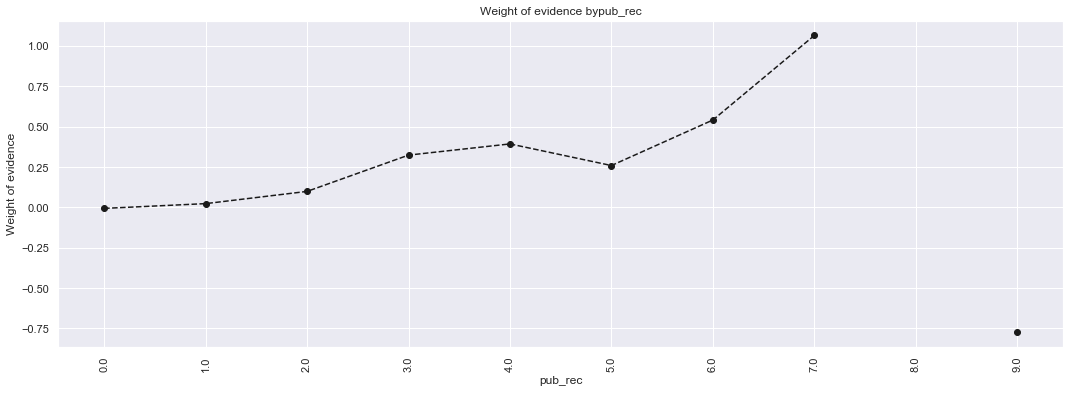

In [191]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [192]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [193]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good  ...  prop_n_bad  \
0     (-0.15, 3.0]    459   0.810458    0.001230    372.0  ...    0.002083   
1       (3.0, 6.0]   6004   0.862758    0.016095   5180.0  ...    0.019732   
2       (6.0, 9.0]  15047   0.870140    0.040337  13093.0  ...    0.046792   
3      (9.0, 12.0]  25169   0.878621    0.067472  22114.0  ...    0.073158   
4     (12.0, 15.0]  33651   0.878934    0.090210  29577.0  ...    0.097560   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.618030             NaN       NaN  inf  
1 -0.232626        0.052301  0.385404  inf  
2 -0.168817        0.007382  0.063809  inf  
3 -0.091584        0.008480  0.077232  inf  
4 -0.088644        0.000313  0.002940  inf  

[5 rows x 12 columns]

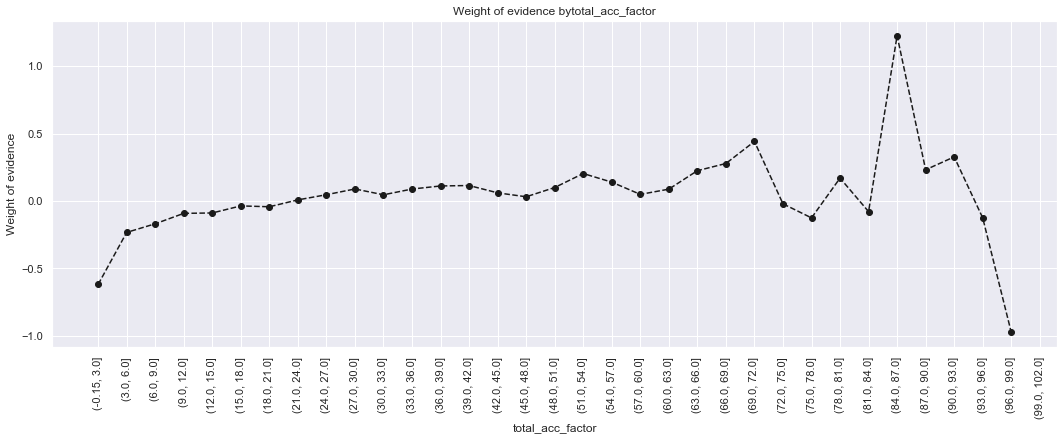

In [194]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [195]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [196]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_output_prep)
df_temp.head()

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good  ...  prop_n_bad  \
0             0.0  371682   0.888025    0.996392  330063.0  ...    0.996647   
1             1.0    1263   0.894695    0.003386    1130.0  ...    0.003185   
2             2.0      70   0.928571    0.000188      65.0  ...    0.000120   
3             3.0       7   0.857143    0.000019       6.0  ...    0.000024   
4             4.0       4   1.000000    0.000011       4.0  ...    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.000289             NaN       NaN  inf  
1  0.068608        0.006670  0.068897  inf  
2  0.493934        0.033876  0.425326  inf  
3 -0.279256        0.071429  0.773190  inf  
4       inf        0.142857       inf  inf  

[5 rows x 12 columns]

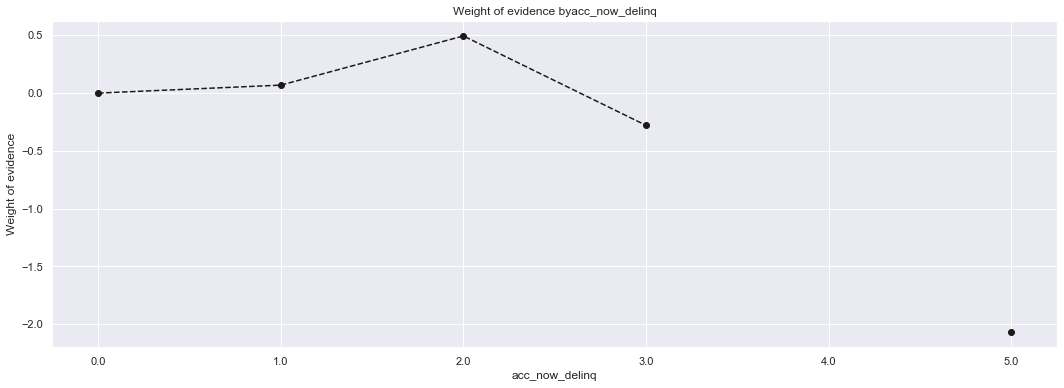

In [197]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [198]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [199]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  ...  \
0     (-9999.999, 5000.0]  19417   0.863779    0.052052  16772.0  ...   
1      (5000.0, 9999.999]  52655   0.873516    0.141156  45995.0  ...   
2   (9999.999, 14999.998]  59570   0.877556    0.159693  52276.0  ...   
3  (14999.998, 19999.998]  51455   0.874628    0.137939  45004.0  ...   
4  (19999.998, 24999.997]  41582   0.882882    0.111472  36712.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.063340 -0.223976             NaN       NaN  inf  
1    0.159487 -0.138603        0.009737  0.085373  inf  
2    0.174669 -0.101530        0.004040  0.037072  inf  
3    0.154482 -0.128500        0.002928  0.026969  inf  
4    0.116622 -0.051006        0.008254  0.077494  inf  

[5 rows x 12 columns]

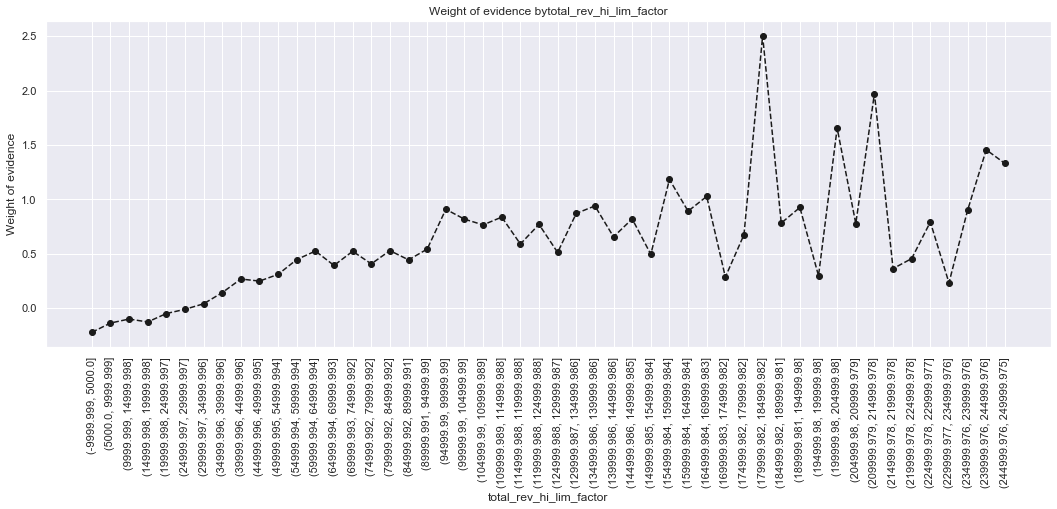

In [200]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [201]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [202]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

installment_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0    (14.276, 43.556]   1812   0.905629    0.004858  1641.0  ...    0.004095   
1    (43.556, 71.443]   4841   0.896302    0.012978  4339.0  ...    0.012021   
2    (71.443, 99.329]   6824   0.891266    0.018294  6082.0  ...    0.017769   
3   (99.329, 127.216]   9138   0.887722    0.024497  8112.0  ...    0.024570   
4  (127.216, 155.102]  10040   0.893625    0.026915  8972.0  ...    0.025575   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.190382             NaN       NaN  0.014179  
1  0.085783        0.009327  0.104598  0.014179  
2  0.032724        0.005036  0.053059  0.014179  
3 -0.003339        0.003545  0.036063  0.014179  
4  0.057305        0.005904  0.060644  0.014179  

[5 rows x 12 columns]

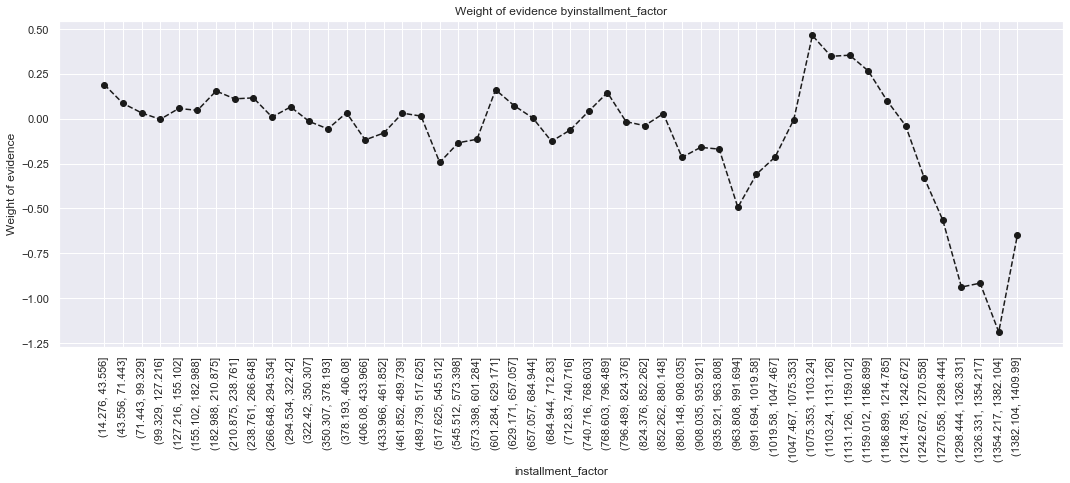

In [203]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [204]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0  (-5243.882, 144693.64]  351904   0.885921    0.943372  311759.0  ...   
1  (144693.64, 287491.28]   19004   0.923016    0.050945   17541.0  ...   
2  (287491.28, 430288.92]    1525   0.927869    0.004088    1415.0  ...   
3  (430288.92, 573086.56]     332   0.939759    0.000890     312.0  ...   
4   (573086.56, 715884.2]     112   0.883929    0.000300      99.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.961350 -0.021283             NaN       NaN  inf  
1    0.035034  0.413036        0.037096  0.434319  inf  
2    0.002634  0.483389        0.004853  0.070353  inf  
3    0.000479  0.676255        0.011890  0.192866  inf  
4    0.000311 -0.040845        0.055830  0.717100  inf  

[5 rows x 12 columns]

In [205]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0   (-5243.882, 73294.82]  231445   0.873231    0.620449  202105.0  ...   
1   (73294.82, 144693.64]  120459   0.910301    0.322922  109654.0  ...   
2  (144693.64, 216092.46]   15885   0.922694    0.042584   14657.0  ...   
3  (216092.46, 287491.28]    3119   0.924655    0.008361    2884.0  ...   
4   (287491.28, 358890.1]    1117   0.925694    0.002994    1034.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.702603 -0.141180             NaN       NaN  inf  
1    0.258747  0.246305        0.037070  0.387485  inf  
2    0.029407  0.408515        0.012393  0.162210  inf  
3    0.005628  0.436332        0.001961  0.027817  inf  
4    0.001988  0.451334        0.001038  0.015001  inf  

[5 rows x 12 columns]

In [206]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [207]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  ...  \
0   (1757.896, 4658.08]     15   0.800000    0.000043    12.0  ...   
1    (4658.08, 7420.16]     40   0.750000    0.000114    30.0  ...   
2   (7420.16, 10182.24]    287   0.874564    0.000818   251.0  ...   
3  (10182.24, 12944.32]    547   0.820841    0.001558   449.0  ...   
4   (12944.32, 15706.4]   1210   0.825620    0.003447   999.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000075 -0.663014             NaN       NaN  0.048053  
1    0.000250 -0.950696        0.050000  0.287682  0.048053  
2    0.000899 -0.107374        0.124564  0.843322  0.048053  
3    0.002446 -0.527253        0.053724  0.419879  0.048053  
4    0.005267 -0.494412        0.004779  0.032841  0.048053  

[5 rows x 12 columns]

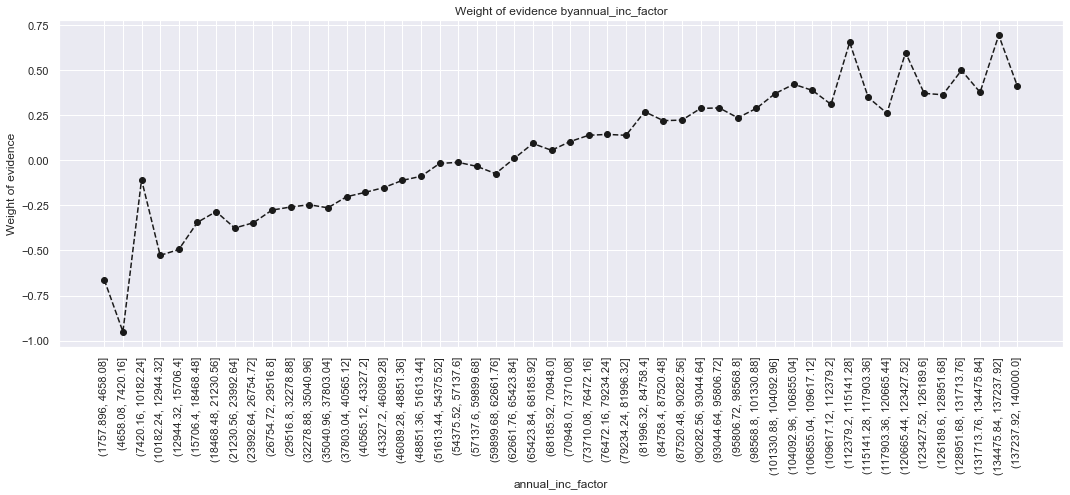

In [208]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [209]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [210]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  ...  \
0                (-0.188, 3.76]   5277   0.867728    0.030531   4579.0  ...   
1                  (3.76, 7.52]  11167   0.883406    0.064608   9865.0  ...   
2                 (7.52, 11.28]  13306   0.890050    0.076983  11843.0  ...   
3                (11.28, 15.04]  13216   0.884912    0.076462  11695.0  ...   
4                 (15.04, 18.8]   9337   0.891507    0.054020   8324.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.036483 -0.202695             NaN       NaN  inf  
1    0.068054 -0.058620        0.015679  0.144075  inf  
2    0.076469  0.007536        0.006643  0.066156  inf  
3    0.079500 -0.043919        0.005137  0.051454  inf  
4    0.052948  0.022515        0.006595  0.066433  inf  

[5 rows x 12 columns]

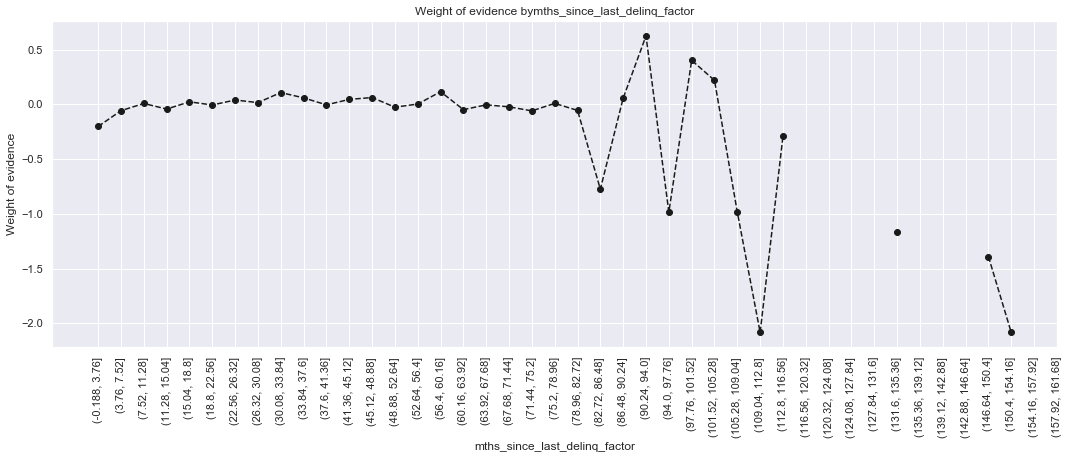

In [211]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [212]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3


In [213]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0  (-5243.882, 144693.64]  351904   0.885921    0.943372  311759.0  ...   
1  (144693.64, 287491.28]   19004   0.923016    0.050945   17541.0  ...   
2  (287491.28, 430288.92]    1525   0.927869    0.004088    1415.0  ...   
3  (430288.92, 573086.56]     332   0.939759    0.000890     312.0  ...   
4   (573086.56, 715884.2]     112   0.883929    0.000300      99.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.961350 -0.021283             NaN       NaN  inf  
1    0.035034  0.413036        0.037096  0.434319  inf  
2    0.002634  0.483389        0.004853  0.070353  inf  
3    0.000479  0.676255        0.011890  0.192866  inf  
4    0.000311 -0.040845        0.055830  0.717100  inf  

[5 rows x 12 columns]

In [214]:
### 50 classes are not enough to fine class annual income as more than 94% lies in first class

In [215]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  ...  \
0   (-5243.882, 73294.82]  231445   0.873231    0.620449  202105.0  ...   
1   (73294.82, 144693.64]  120459   0.910301    0.322922  109654.0  ...   
2  (144693.64, 216092.46]   15885   0.922694    0.042584   14657.0  ...   
3  (216092.46, 287491.28]    3119   0.924655    0.008361    2884.0  ...   
4   (287491.28, 358890.1]    1117   0.925694    0.002994    1034.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.702603 -0.141180             NaN       NaN  inf  
1    0.258747  0.246305        0.037070  0.387485  inf  
2    0.029407  0.408515        0.012393  0.162210  inf  
3    0.005628  0.436332        0.001961  0.027817  inf  
4    0.001988  0.451334        0.001038  0.015001  inf  

[5 rows x 12 columns]

In [216]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [217]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  ...  \
0   (1757.896, 4658.08]     15   0.800000    0.000043    12.0  ...   
1    (4658.08, 7420.16]     40   0.750000    0.000114    30.0  ...   
2   (7420.16, 10182.24]    287   0.874564    0.000818   251.0  ...   
3  (10182.24, 12944.32]    547   0.820841    0.001558   449.0  ...   
4   (12944.32, 15706.4]   1210   0.825620    0.003447   999.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000075 -0.663014             NaN       NaN  0.048053  
1    0.000250 -0.950696        0.050000  0.287682  0.048053  
2    0.000899 -0.107374        0.124564  0.843322  0.048053  
3    0.002446 -0.527253        0.053724  0.419879  0.048053  
4    0.005267 -0.494412        0.004779  0.032841  0.048053  

[5 rows x 12 columns]

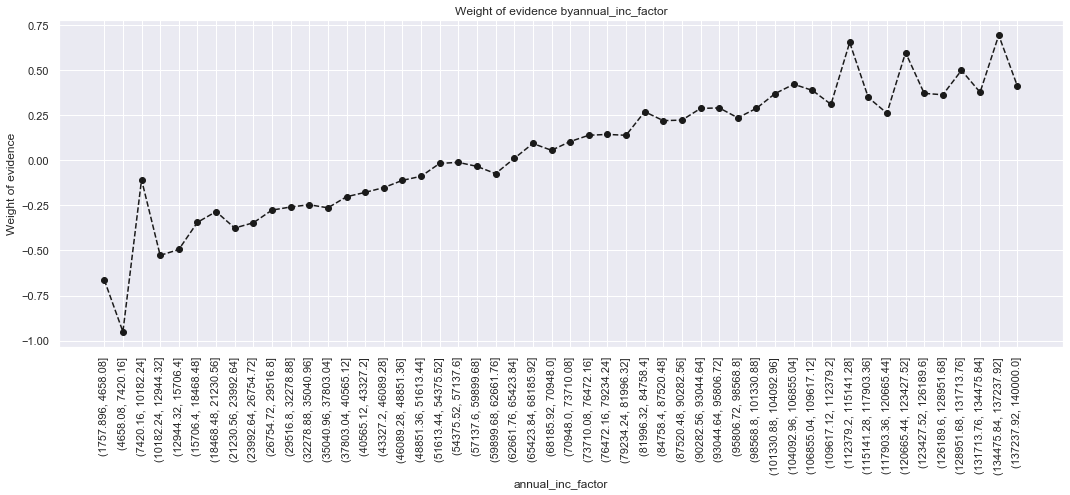

In [218]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

######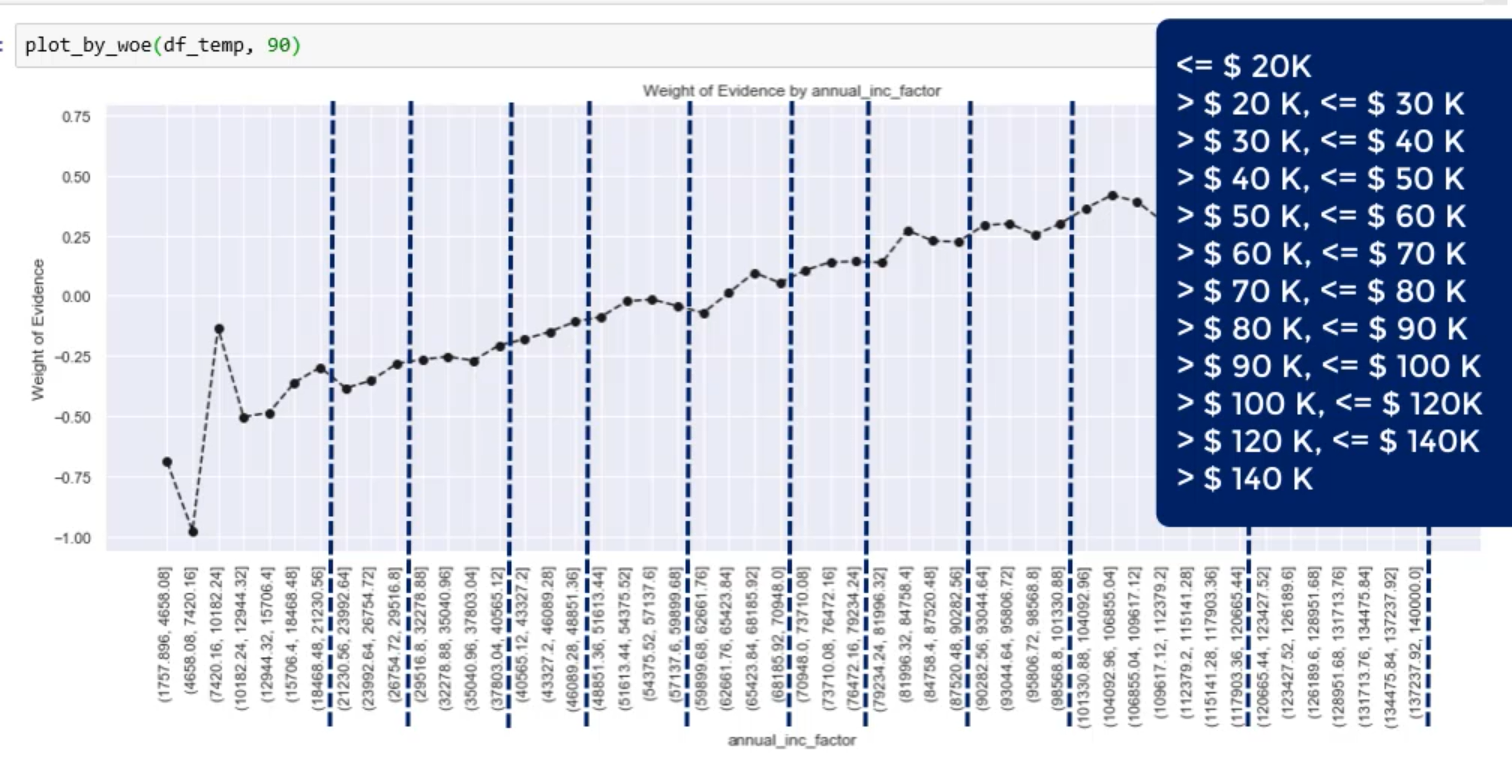

In [219]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [220]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  ...  \
0                (-0.188, 3.76]   5277   0.867728    0.030531   4579.0  ...   
1                  (3.76, 7.52]  11167   0.883406    0.064608   9865.0  ...   
2                 (7.52, 11.28]  13306   0.890050    0.076983  11843.0  ...   
3                (11.28, 15.04]  13216   0.884912    0.076462  11695.0  ...   
4                 (15.04, 18.8]   9337   0.891507    0.054020   8324.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.036483 -0.202695             NaN       NaN  inf  
1    0.068054 -0.058620        0.015679  0.144075  inf  
2    0.076469  0.007536        0.006643  0.066156  inf  
3    0.079500 -0.043919        0.005137  0.051454  inf  
4    0.052948  0.022515        0.006595  0.066433  inf  

[5 rows x 12 columns]

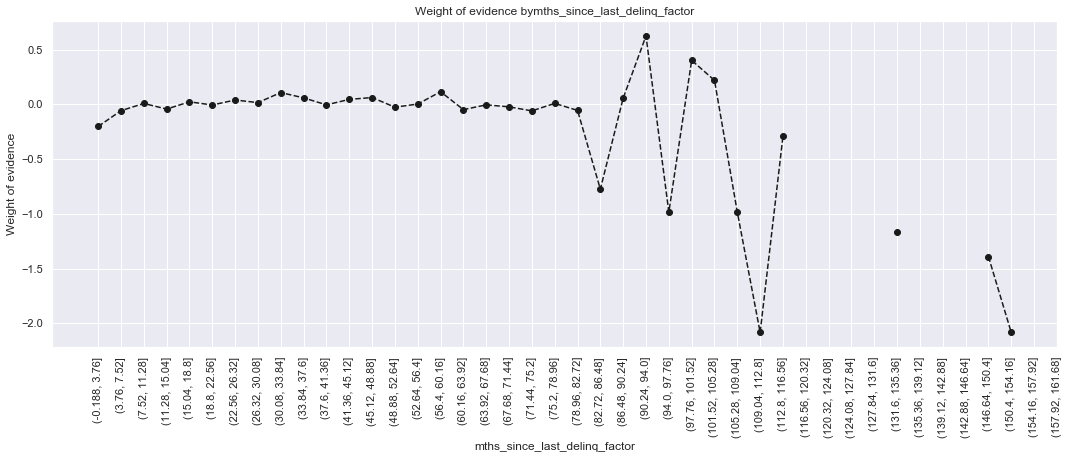

In [221]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [222]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [223]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_output_prep)
# We calculate weight of evidence.
df_temp.head()

dti_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0  (-0.04, 0.4]    745   0.875168    0.001997   652.0  ...    0.002227   
1    (0.4, 0.8]    808   0.919554    0.002166   743.0  ...    0.001557   
2    (0.8, 1.2]    922   0.895879    0.002472   826.0  ...    0.002299   
3    (1.2, 1.6]   1043   0.896453    0.002796   935.0  ...    0.002586   
4    (1.6, 2.0]   1172   0.901877    0.003142  1057.0  ...    0.002754   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.123571             NaN       NaN  0.028323  
1  0.365293        0.044387  0.488864  0.028323  
2  0.081231        0.023676  0.284062  0.028323  
3  0.087400        0.000574  0.006169  0.028323  
4  0.147242        0.005425  0.059843  0.028323  

[5 rows x 12 columns]

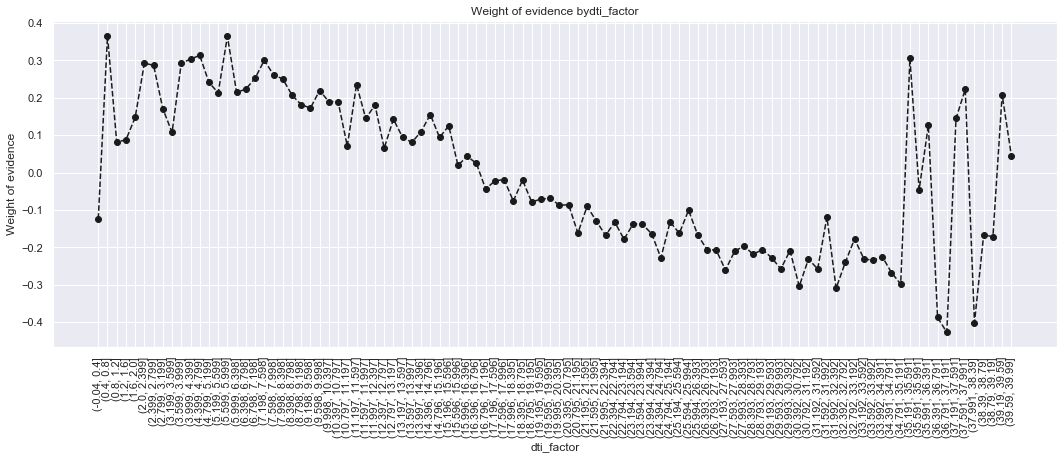

In [224]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [225]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [226]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dti_factor  n_obs  prop_good  prop_n_obs  n_good  ...  prop_n_bad  \
0  (-0.035, 0.7]   1366   0.893851    0.003690  1221.0  ...    0.003501   
1     (0.7, 1.4]   1664   0.892428    0.004496  1485.0  ...    0.004322   
2     (1.4, 2.1]   1986   0.911883    0.005365  1811.0  ...    0.004225   
3     (2.1, 2.8]   2594   0.910563    0.007008  2362.0  ...    0.005601   
4     (2.8, 3.5]   3135   0.902073    0.008470  2828.0  ...    0.007412   

        WoE  diff_prop_good  diff_WoE        IV  
0  0.059177             NaN       NaN  0.027235  
1  0.044269        0.001423  0.014907  0.027235  
2  0.265333        0.019455  0.221064  0.027235  
3  0.249012        0.001320  0.016322  0.027235  
4  0.148962        0.008489  0.100049  0.027235  

[5 rows x 12 columns]

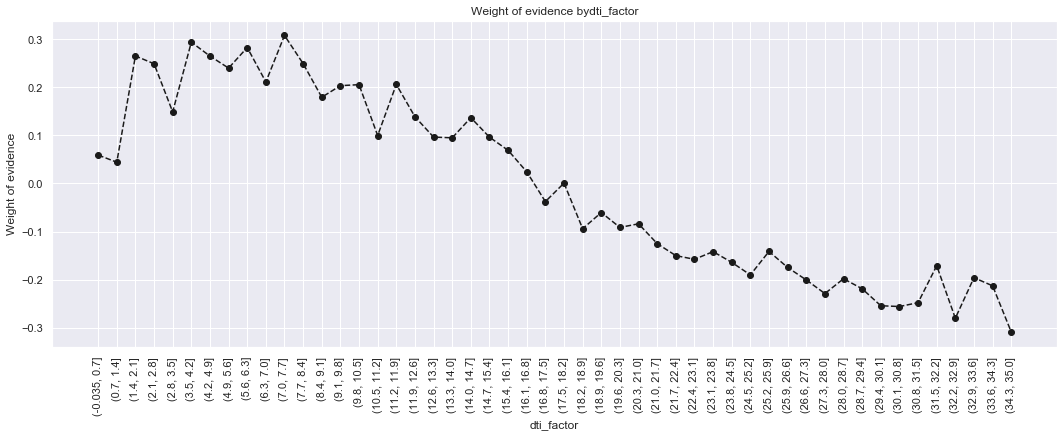

In [227]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [228]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [229]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_output_prep[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  ...  \
0                (-0.121, 2.42]   1086   0.763352    0.021691   829.0  ...   
1                  (2.42, 4.84]     76   0.894737    0.001518    68.0  ...   
2                  (4.84, 7.26]    163   0.914110    0.003256   149.0  ...   
3                  (7.26, 9.68]    156   0.903846    0.003116   141.0  ...   
4                  (9.68, 12.1]    292   0.904110    0.005832   264.0  ...   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.046449 -0.914379             NaN       NaN  0.075899  
1    0.001446  0.054543        0.131385  0.968922  0.075899  
2    0.002530  0.279366        0.019374  0.224823  0.075899  
3    0.002711  0.155187        0.010264  0.124179  0.075899  
4    0.005061  0.158222        0.000263  0.003035  0.075899  

[5 rows x 12 columns]

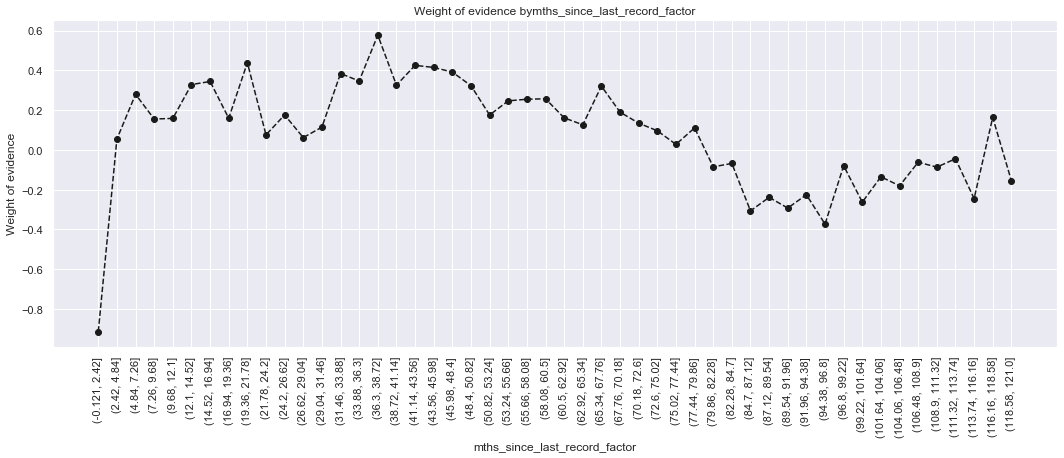

In [230]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [231]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [232]:
df_inputs_prepr.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  373028.000000  3.730280e+05  3.730280e+05  373028.000000   
mean   233050.214038  1.308110e+07  1.459914e+07   14318.314778   
std    134586.411795  1.089460e+07  1.168336e+07    8287.668197   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116448.750000  3.639984e+06  4.379781e+06    8000.000000   
50%    233085.500000  1.010677e+07  1.194003e+07   12000.000000   
75%    349508.250000  2.073958e+07  2.300367e+07   20000.000000   
max    466283.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  ...  mths_since_last_record:3-20  \
count  373028.000000  ...                373028.000000   
mean    14292.326514  ...                     0.004233   
std      8275.446272  ...                     0.064923   
min       500.000000  ...                     0.000000   
25%      8000.000000  ...                     0.000000   
50%     12000.000000  ...                     0.000000   
75%     20000.000000  ...                     0.000000   
max     35000.000000  ...                     1.000000   

       mths_since_last_record:21-31  mths_since_last_record:32-80  \
count                 373028.000000                 373028.000000   
mean                       0.005359                      0.060060   
std                        0.073008                      0.237598   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        0.000000                      0.000000   
max                        1.000000                      1.000000   

       mths_since_last_record:81-86  mths_since_last_record:>86  
count                 373028.000000               373028.000000  
mean                       0.006718                    0.054937  
std                        0.081688                    0.227857  
min                        0.000000                    0.000000  
25%                        0.000000                    0.000000  
50%                        0.000000                    0.000000  
75%                        0.000000                    0.000000  
max                        1.000000                    1.000000  

[8 rows x 287 columns]

In [233]:
loan_data_inputs_test = df_inputs_prepr.copy()

In [234]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# loan_data_outputs_train.to_csv('loan_data_targets_train.csv')
# loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
# loan_data_outputs_test.to_csv('loan_data_targets_test.csv')